In [5]:
import dataretrieval.nwis as nwis
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from create_river_roms import *

In [6]:
# start = "2013-01-1T00:00Z"
# end = "2013-12-31T00:00Z"

start, end = '2022-12-14T18:00Z', '2022-12-18T01:00Z'


# discharge stations
stations = ['15276000', '15290000', '15271000', '15239900', '15281000', '15295700',
            '15239070', '15275100', '15266300', '15284000', '15292000', '15274600']

station_discharge, station_temp = {}, {}
# for station in temp_stations.values():
#     print(station)
#     station_temp[station] = find_temp(station, start, end)

for station in discharge_stations.values():
    print(station)
    station_discharge[station] = find_discharge(station, start, end, ndays=8)


NameError: name 'discharge_stations' is not defined

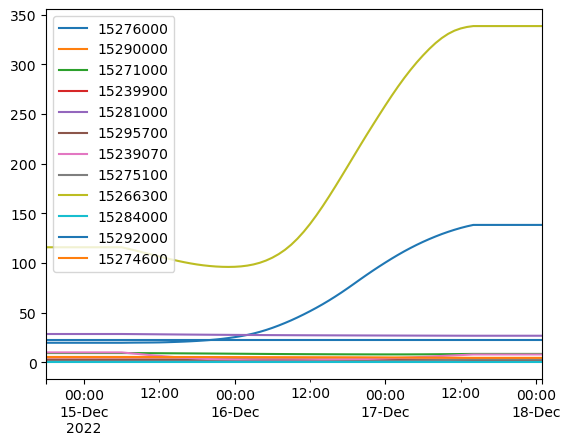

In [2736]:
for station in discharge_stations.values():
    station_discharge[station].plot(label=station)
plt.legend()


fill over 2 days with function
calculating mean time series


<AxesSubplot:>

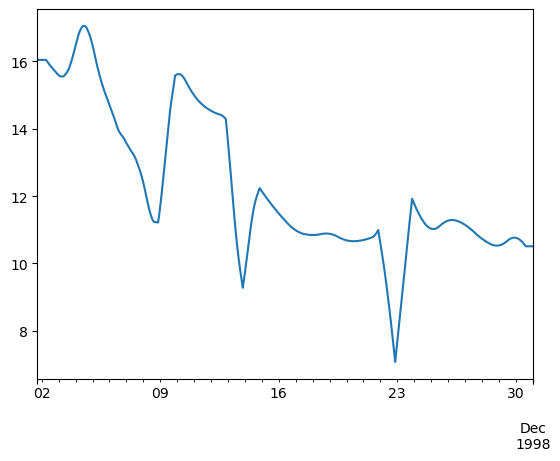

In [2752]:
start, end = '1998-11-1T18:00Z', '1998-12-1T01:00Z'
df = find_discharge("15271000", start, end, ndays=2)
df.plot()

<AxesSubplot:>

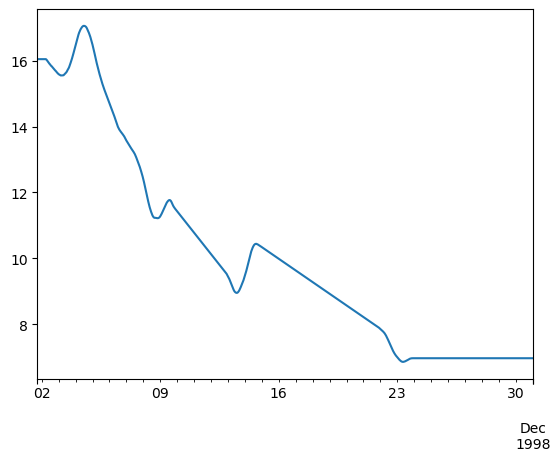

In [2753]:
start, end = '1998-11-1T18:00Z', '1998-12-1T01:00Z'
df = find_discharge("15271000", start, end, ndays=8)
df.plot()

In [2735]:
df[df.isnull()]

Series([], Freq: H, Name: 00060, dtype: float64)

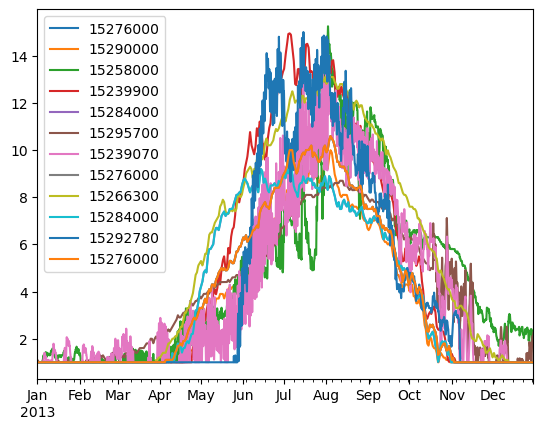

In [2671]:
for station in temp_stations.values():
    station_temp[station].plot(label=station)
plt.legend()


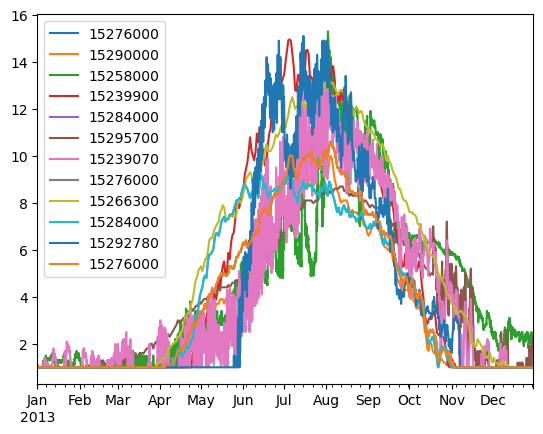

In [2641]:
for station in temp_stations.values():
    station_temp[station].plot(label=station)
plt.legend()


In [2654]:
start = "1998-1-1T01:00Z"
end = "1998-12-31T23:00Z"
station = "15266300"
df = find_discharge(station, start, end)
df

fill over 8 days with function
calculating mean time series


1998-01-01 01:00:00    57.151683
1998-01-01 02:00:00    57.151683
1998-01-01 03:00:00    57.151683
1998-01-01 04:00:00    57.151683
1998-01-01 05:00:00    57.151683
                         ...    
1998-12-31 19:00:00    59.362692
1998-12-31 20:00:00    59.362692
1998-12-31 21:00:00    59.362692
1998-12-31 22:00:00    59.362692
1998-12-31 23:00:00    59.362692
Freq: H, Name: 00060, Length: 8759, dtype: float64

<AxesSubplot:>

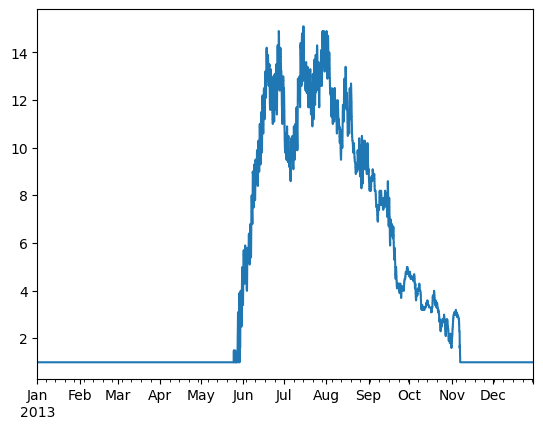

In [2643]:
station_temp["15292780"].plot()

tests

fill over 8 days with function
calculating mean time series


<AxesSubplot:>

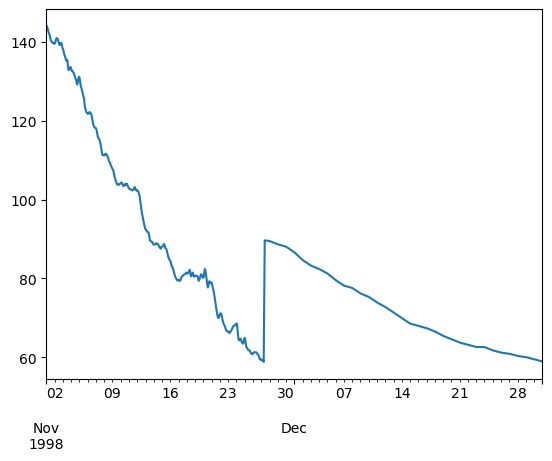

In [2646]:
start = "1998-11-1T00:00Z"
end = "1998-12-31T00:00Z"
station = "15266300"
df = find_discharge(station, start, end)
df.plot()

fill over 8 days with function
calculating mean time series


<AxesSubplot:>

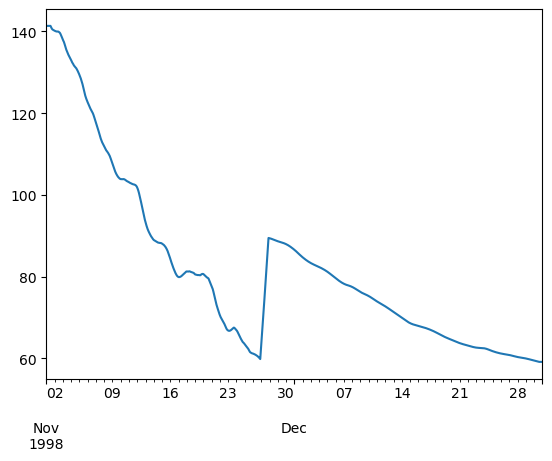

In [2657]:
start = "1998-11-1T00:00Z"
end = "1998-12-31T00:00Z"
station = "15266300"
df = find_discharge(station, start, end)
df.plot()

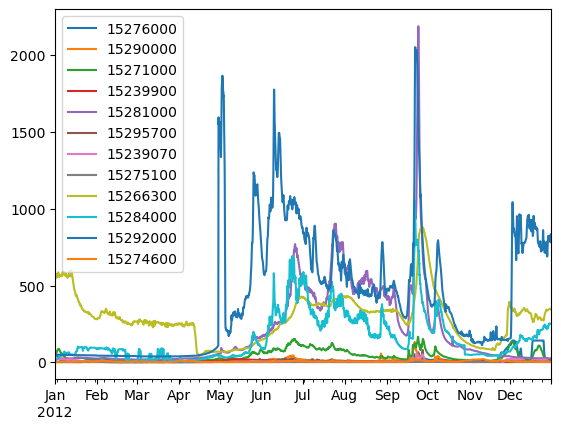

In [2452]:
for station in stations:
    station_discharge[station].plot(label=station)
plt.legend()


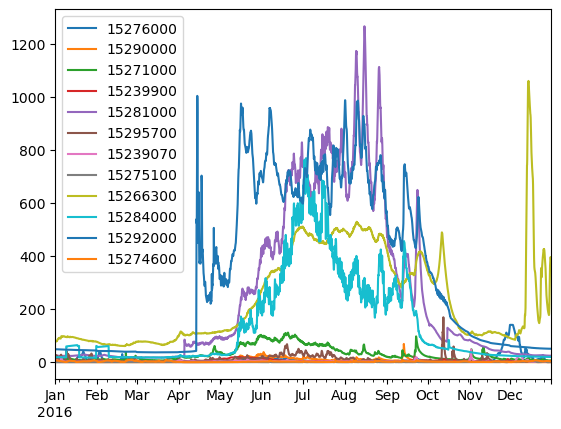

In [2450]:
for station in stations:
    station_discharge[station].plot(label=station)
plt.legend()


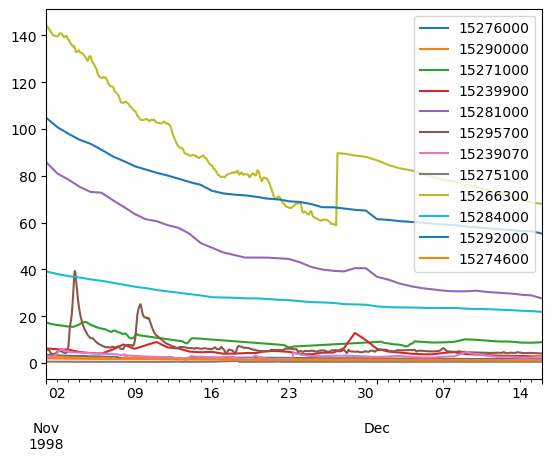

In [2406]:
for station in stations:
    station_discharge[station].plot(label=station)
plt.legend()


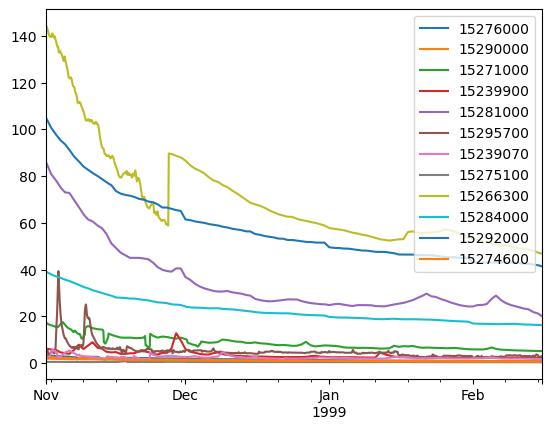

In [ ]:
for station in stations:
    station_discharge[station].plot(label=station)
plt.legend()


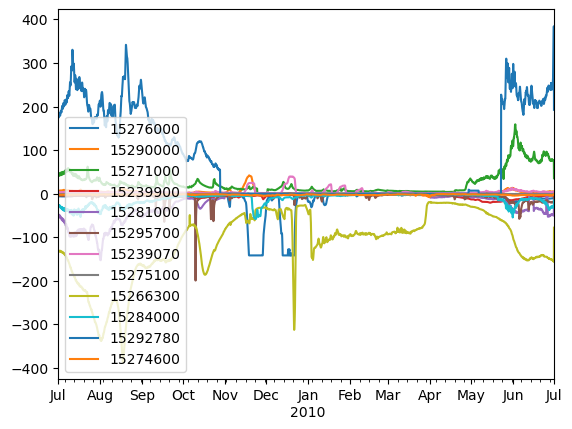

In [2039]:
for station in stations:
    station_discharge[station].plot(label=station)
plt.legend()


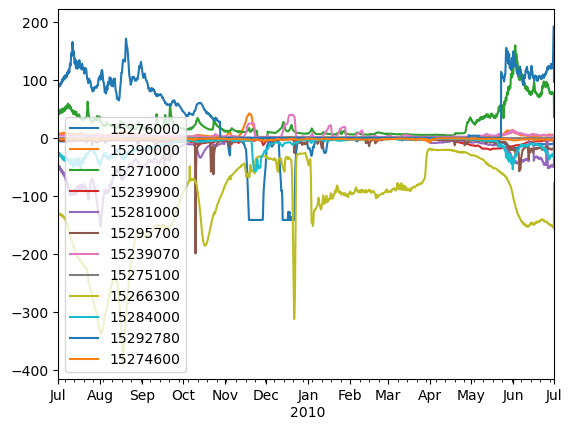

In [2036]:
for station in stations:
    station_discharge[station].plot(label=station)
plt.legend()


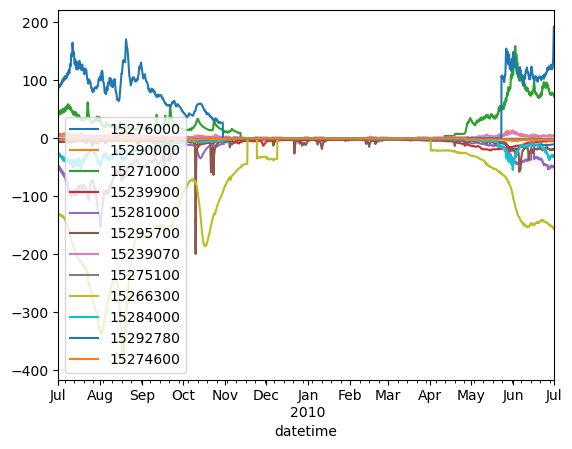

In [1824]:
for station in stations:
    station_discharge[station].plot(label=station)
plt.legend()


Using gage data for station 15266300.


<AxesSubplot:xlabel='datetime'>

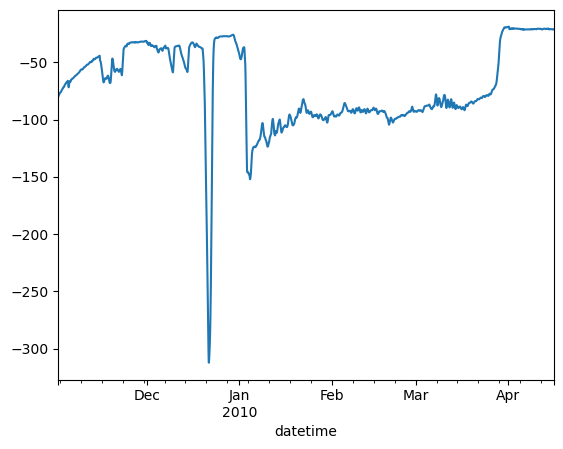

In [1828]:
# gage data used
df = find_discharge("15266300", "2009-11-1", "2010-4-15")
df.plot()

<AxesSubplot:xlabel='datetime'>

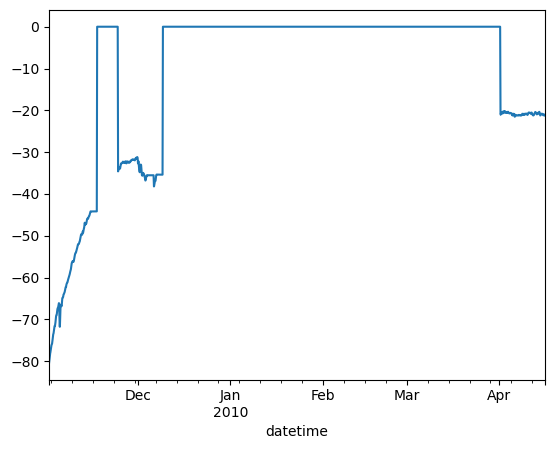

In [1825]:
# no gage data used
df = find_discharge("15266300", "2009-11-1", "2010-4-15")
df.plot()

Using gage data for station 15266300.


<AxesSubplot:xlabel='datetime'>

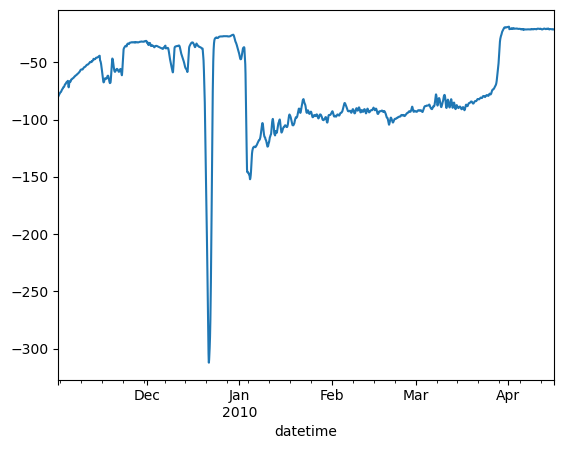

In [1905]:
# after code changes counting consecutive nans
df = find_discharge("15266300", "2009-11-1", "2010-4-15")
df.plot()

Using gage data for station 15266300.


<AxesSubplot:>

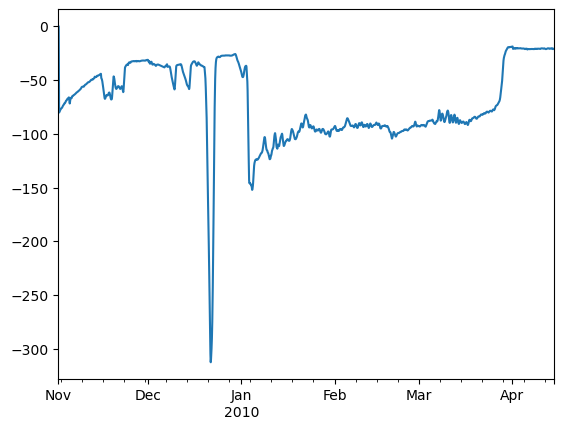

In [2034]:
# after code changes counting consecutive nans
df = find_discharge("15266300", "2009-11-1", "2010-4-15")
df.plot()

<AxesSubplot:xlabel='datetime'>

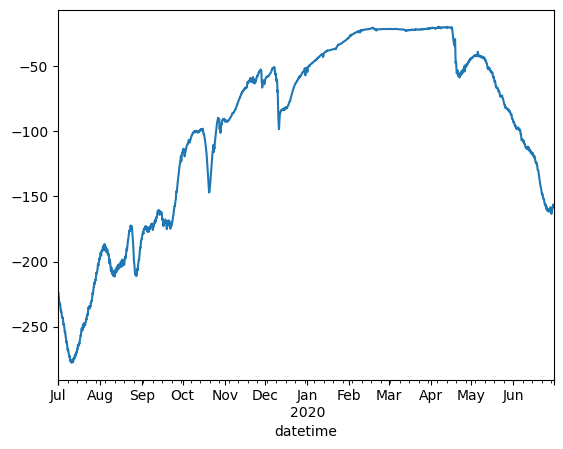

In [1826]:
start = "2019-07-1T00:00Z"
end = "2020-7-1T00:00Z"
df = find_discharge("15266300", start, end)
df.plot()

<AxesSubplot:xlabel='datetime'>

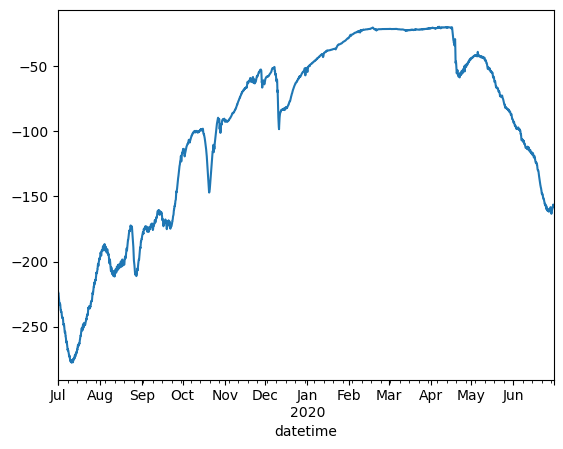

In [1904]:
# after code changes counting consecutive nans
start = "2019-07-1T00:00Z"
end = "2020-7-1T00:00Z"
df = find_discharge("15266300", start, end)
df.plot()

In [1960]:
    station_use = "15266300"
    data1 = nwis.get_iv(sites=station_use, parameterCd=["00060"], start=start, end=end)[0]
    if data1.index.dtype == "O":
        data1.index = pd.to_datetime(data1.index, utc=True)
    data2 = nwis.get_iv(sites=station_use, parameterCd=["00065"], start=start, end=end)[0]
    if data2.index.dtype == "O":
        data2.index = pd.to_datetime(data2.index, utc=True)
    data = pd.concat([data1,data2], axis=1)    
    data = data.tz_convert(None)
    # import pdb; pdb.set_trace()
    # if data.index.dtype == "O":
    #     data.index = pd.to_datetime(data.index, utc=True)

    # if data.empty:
    #     print(f"Using stats for station {station}")
    #     # if data is not available at all (outside window of availability) use annual mean
    #     # Retrieve the statistics
    #     stats = nwis.get_stats(sites=station_use, parameterCd="00060", statReportType="daily", statTypeCd="mean")[0]
    #     dischargeh = repeat_years_return_range(stats["mean_va"].values, start, end)

    # else:
    #     if "00060" not in data.columns:
    #         data["00060"] = np.nan# pd.NA
    #     if "00065" not in data.columns:
    #         data["00065"] = np.nan# pd.NA
    #     data = data[["00060", "00065"]]

    #     # catch all non-data values in data and make sure they are nans
    #     data[data == -999999.0] = np.nan# pd.NA
    #     # discharge is -26999.973 if iced
    #     data.loc[data["00060"] + 26999.973 < 1e-3, "00060"] = pd.NA

    #     # this will hold the final combined time series
    #     discharge_data = data["00060"]
        
    #     # if some values are missing from discharge_data, try to fill in other ways
    #     if discharge_data.isnull().sum() > 0:

    #         # try to use gage data instead, but need rating curve data to do so
    #         ratingDataOrig = nwis.get_ratings(site=station_use, file_type="exsa")[0]

    #         # create estimate using rating curve and gage height if discharge data not fully available
    #         if not ratingDataOrig.empty:
                
    #             print(f"Using gage data for station {station}.")
                
    #             # see if rating curve needs to be extrapolated. Maybe have a warning to check the reasonableness of the
    #             # output in this case
    #             if data["00065"].max() > ratingDataOrig["INDEP"].max():
    #                 print(f"Extrapolating ratingData upward for station {station}.")
    #                 ratingData = extrapolate_rating_curve(ratingDataOrig, data["00065"].max(), "up")
                    
    #             else:
    #                 ratingData = ratingDataOrig

    #             if data["00065"].min() < ratingData["INDEP"].min():
    #                 print(f"Extrapolating ratingData downward for station {station}.")

    #                 ratingData2 = extrapolate_rating_curve(ratingData, data["00065"].min(), "down")

    #             else:
    #                 ratingData2 = ratingData
    #             # import pdb; pdb.set_trace()
                
                    
    #             # Do a little rolling mean to smooth the data — sometimes it's really jumpy
    #             data["00065"] = data["00065"].rolling(window="12H", center=True).mean()

    #             streamflow_estimate_for_gage_data = ratingData2.set_index("INDEP")["DEP"].loc[data["00065"][data["00065"].notnull()].round(2)]

    #             # cap values more than twice the max measured discharge value
    #             # https://kacv.net/brad/nws/lesson7.html
    #             ind = streamflow_estimate_for_gage_data > ratingDataOrig["DEP"].max()*2
    #             streamflow_estimate_for_gage_data.loc[ind] = ratingDataOrig["DEP"].max()*2
                
    #             # cap min values at 0
    #             ind = streamflow_estimate_for_gage_data < 0
    #             streamflow_estimate_for_gage_data.loc[ind] = 0

    #             # combine. Use streamflow estimate anywhere discharge_data has nan's
    #             streamflow_estimate_for_gage_data.index = data[data["00065"].notnull()].index
    #             discharge_data.loc[discharge_data.isnull()] = streamflow_estimate_for_gage_data.loc[discharge_data.isnull()]

    #     # convert any leftover nan's to 0
    #     discharge_data[discharge_data.isnull()] = 0.0

    #     # average to hourly
    #     dischargeh = discharge_data.groupby(pd.Grouper(freq='1H')).mean("numeric_only")

    # # convert from cubic feet per second to cubic meters per second
    # dischargeh *= 0.3048**3

    # # fill in nan's if less than 2 days
    # dischargeh = dischargeh.interpolate(method="ffill", limit=2*24)

    # # If there are still nan's, fill with 0s
    # dischargeh = dischargeh.fillna(0)



In [1961]:
index = pd.date_range(start.replace("Z",""), end.replace("Z",""), freq="15T")
data = data.reindex(index)
na_groups, lengths_consecutive_na, times_consecutive_na = find_na_groups(data["00060"])

In [1958]:

# # characterize groups of consecutive nans
# na_groups, lengths_consecutive_na, times_consecutive_na = find_na_groups(data["00060"])

# only interpolate if consecutive nan's less than 2 days
if times_consecutive_na.min() <= pd.Timedelta("2 days"):
    # ind = times_consecutive_na.loc[na_groups] <= pd.Timedelta("2 days")
    # na_groups[ind.values].index
    
    for group in na_groups:
        if times_consecutive_na.loc[group] <= pd.Timedelta("2 days"):
            # data["00060"].loc[na_groups[na_groups == group].index]
            ind = na_groups[na_groups == group].index
            data["00060"].loc[ind] = data["00060"].loc[ind].interpolate()


/var/folders/mf/by34w_vj643fb7dvt5skt7p40000gn/T/ipykernel_54677/1294057543.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["00060"].loc[ind] = data["00060"].loc[ind].interpolate()


In [1992]:
df = data["00060"].copy()
df

2009-07-01 00:00:00     9360.0
2009-07-01 00:15:00     9430.0
2009-07-01 00:30:00     9430.0
2009-07-01 00:45:00     9390.0
2009-07-01 01:00:00     9390.0
                        ...   
2010-06-30 23:00:00    11000.0
2010-06-30 23:15:00        NaN
2010-06-30 23:30:00        NaN
2010-06-30 23:45:00        NaN
2010-07-01 00:00:00        NaN
Freq: 15T, Name: 00060, Length: 35041, dtype: float64

In [1994]:
df.notna().cumsum(), df.isna()

(2009-07-01 00:00:00        1
 2009-07-01 00:15:00        2
 2009-07-01 00:30:00        3
 2009-07-01 00:45:00        4
 2009-07-01 01:00:00        5
                        ...  
 2010-06-30 23:00:00    22941
 2010-06-30 23:15:00    22941
 2010-06-30 23:30:00    22941
 2010-06-30 23:45:00    22941
 2010-07-01 00:00:00    22941
 Freq: 15T, Name: 00060, Length: 35041, dtype: int64,
 2009-07-01 00:00:00    False
 2009-07-01 00:15:00    False
 2009-07-01 00:30:00    False
 2009-07-01 00:45:00    False
 2009-07-01 01:00:00    False
                        ...  
 2010-06-30 23:00:00    False
 2010-06-30 23:15:00     True
 2010-06-30 23:30:00     True
 2010-06-30 23:45:00     True
 2010-07-01 00:00:00     True
 Freq: 15T, Name: 00060, Length: 35041, dtype: bool)

In [2011]:
(df.shift(periods=-1, fill_value=False).isna() | df.shift(periods=1, fill_value=False).isna()).sum()

12109

In [2009]:
df.isna().sum()

12100

In [2013]:
ind_wide = df.shift(periods=-1, fill_value=False).isna() | df.shift(periods=1, fill_value=False).isna()
df.notna().cumsum()[ind_wide]

2009-10-05 23:45:00     9312
2009-10-06 00:00:00     9312
2009-10-06 00:15:00     9312
2009-10-06 00:30:00     9312
2009-10-06 00:45:00     9312
                       ...  
2010-06-30 23:00:00    22941
2010-06-30 23:15:00    22941
2010-06-30 23:30:00    22941
2010-06-30 23:45:00    22941
2010-07-01 00:00:00    22941
Name: 00060, Length: 12109, dtype: int64

In [2012]:
na_groups = df.notna().cumsum()[df.isna()]  # CAN I ADD HERE TO GET NEARBY VALUES?
na_groups

2009-10-06 00:00:00     9312
2009-10-06 00:15:00     9312
2009-10-06 00:30:00     9312
2009-10-06 00:45:00     9312
2009-11-15 09:00:00    13184
                       ...  
2010-04-01 07:45:00    14240
2010-06-30 23:15:00    22941
2010-06-30 23:30:00    22941
2010-06-30 23:45:00    22941
2010-07-01 00:00:00    22941
Name: 00060, Length: 12100, dtype: int64

In [1979]:
na_groups == group

2009-10-06 00:00:00    False
2009-10-06 00:15:00    False
2009-10-06 00:30:00    False
2009-10-06 00:45:00    False
2009-11-15 09:00:00    False
                       ...  
2010-04-01 07:45:00    False
2010-06-30 23:15:00     True
2010-06-30 23:30:00     True
2010-06-30 23:45:00     True
2010-07-01 00:00:00     True
Name: 00060, Length: 12100, dtype: bool

In [1980]:
times_consecutive_na.loc[na_groups[0]] <= pd.Timedelta("2 days")
ind = na_groups[na_groups == group].index
# data["00060"].loc[ind].interpolate()
ind

DatetimeIndex(['2010-06-30 23:15:00', '2010-06-30 23:30:00',
               '2010-06-30 23:45:00', '2010-07-01 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [1984]:
data["00060"].index.get_loc(ind[0]), data["00060"].index.get_loc(ind[-1])

(35037, 35040)

In [1991]:
istart = data["00060"].index.get_loc(ind[0]) - 1
iend = data["00060"].index.get_loc(ind[-1]) + 2
data["00060"].iloc[istart:iend]

2010-06-30 23:00:00    11000.0
2010-06-30 23:15:00        NaN
2010-06-30 23:30:00        NaN
2010-06-30 23:45:00        NaN
2010-07-01 00:00:00        NaN
Freq: 15T, Name: 00060, dtype: float64

In [1971]:
ind = times_consecutive_na.loc[na_groups] <= pd.Timedelta("2 days")
ind2 = na_groups[ind.values].index
data["00060"].loc[ind2] = data["00060"].loc[ind2].interpolate()



/var/folders/mf/by34w_vj643fb7dvt5skt7p40000gn/T/ipykernel_54677/607524901.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["00060"].loc[ind2] = data["00060"].loc[ind2].interpolate()


InvalidIndexError: DatetimeIndex(['2010-06-30 23:15:00', '2010-06-30 23:30:00',
               '2010-06-30 23:45:00', '2010-07-01 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [1975]:
ind2[:50]

DatetimeIndex(['2009-10-06 00:00:00', '2009-10-06 00:15:00',
               '2009-10-06 00:30:00', '2009-10-06 00:45:00',
               '2009-12-04 09:00:00', '2009-12-04 09:15:00',
               '2009-12-04 09:30:00', '2009-12-04 09:45:00',
               '2009-12-04 10:00:00', '2009-12-04 10:15:00',
               '2009-12-04 10:30:00', '2009-12-04 10:45:00',
               '2009-12-04 11:00:00', '2009-12-04 11:15:00',
               '2009-12-04 11:30:00', '2009-12-04 11:45:00',
               '2009-12-04 12:00:00', '2009-12-04 12:15:00',
               '2009-12-04 12:30:00', '2009-12-04 12:45:00',
               '2009-12-04 13:00:00', '2009-12-04 13:15:00',
               '2009-12-04 13:30:00', '2009-12-04 13:45:00',
               '2009-12-04 14:00:00', '2009-12-04 14:15:00',
               '2009-12-04 14:30:00', '2009-12-04 14:45:00',
               '2009-12-04 15:00:00', '2009-12-04 15:15:00',
               '2009-12-04 15:30:00', '2009-12-04 15:45:00',
               '2009-12-

In [1977]:
data["00060"].loc[ind2].loc["2009-12-4"]

2009-12-04 09:00:00   NaN
2009-12-04 09:15:00   NaN
2009-12-04 09:30:00   NaN
2009-12-04 09:45:00   NaN
2009-12-04 10:00:00   NaN
2009-12-04 10:15:00   NaN
2009-12-04 10:30:00   NaN
2009-12-04 10:45:00   NaN
2009-12-04 11:00:00   NaN
2009-12-04 11:15:00   NaN
2009-12-04 11:30:00   NaN
2009-12-04 11:45:00   NaN
2009-12-04 12:00:00   NaN
2009-12-04 12:15:00   NaN
2009-12-04 12:30:00   NaN
2009-12-04 12:45:00   NaN
2009-12-04 13:00:00   NaN
2009-12-04 13:15:00   NaN
2009-12-04 13:30:00   NaN
2009-12-04 13:45:00   NaN
2009-12-04 14:00:00   NaN
2009-12-04 14:15:00   NaN
2009-12-04 14:30:00   NaN
2009-12-04 14:45:00   NaN
2009-12-04 15:00:00   NaN
2009-12-04 15:15:00   NaN
2009-12-04 15:30:00   NaN
2009-12-04 15:45:00   NaN
2009-12-04 16:00:00   NaN
2009-12-04 16:15:00   NaN
2009-12-04 16:30:00   NaN
2009-12-04 16:45:00   NaN
2009-12-04 17:00:00   NaN
2009-12-04 17:15:00   NaN
2009-12-04 17:30:00   NaN
2009-12-04 17:45:00   NaN
2009-12-04 18:00:00   NaN
2009-12-04 18:15:00   NaN
2009-12-04 1

<AxesSubplot:>

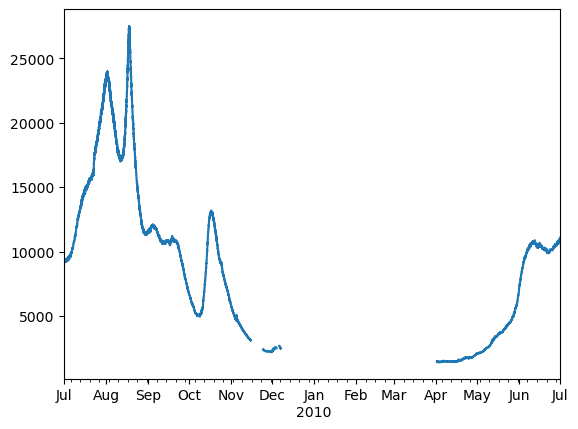

In [1970]:
data["00060"].plot()

<AxesSubplot:>

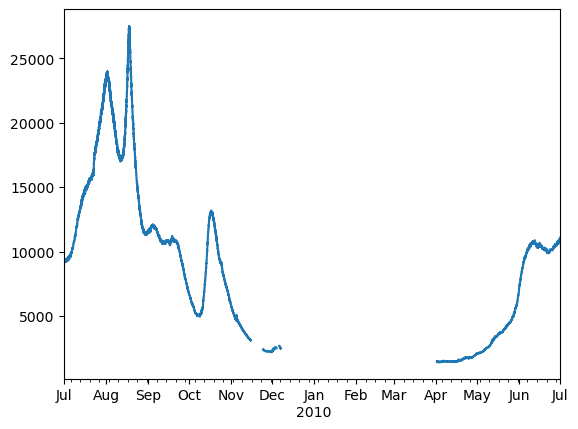

In [1972]:
data["00060"].plot()

In [1959]:
times_consecutive_na.min()

Timedelta('0 days 01:00:00')

In [1957]:
times_consecutive_na.max() <= pd.Timedelta("2 days")

False

In [1938]:
times_consecutive_na.loc[na_groups[0]]

Timedelta('0 days 01:00:00')

In [1945]:
ind = times_consecutive_na.loc[na_groups] <= pd.Timedelta("2 days")
ind

00060
9312      True
9312      True
9312      True
9312      True
13184    False
         ...  
14240    False
22941     True
22941     True
22941     True
22941     True
Name: 00060, Length: 12100, dtype: bool

In [1956]:
na_groups[ind.values].index

DatetimeIndex(['2009-10-06 00:00:00', '2009-10-06 00:15:00',
               '2009-10-06 00:30:00', '2009-10-06 00:45:00',
               '2009-12-04 09:00:00', '2009-12-04 09:15:00',
               '2009-12-04 09:30:00', '2009-12-04 09:45:00',
               '2009-12-04 10:00:00', '2009-12-04 10:15:00',
               ...
               '2009-12-06 07:30:00', '2009-12-06 07:45:00',
               '2009-12-06 08:00:00', '2009-12-06 08:15:00',
               '2009-12-06 08:30:00', '2009-12-06 08:45:00',
               '2010-06-30 23:15:00', '2010-06-30 23:30:00',
               '2010-06-30 23:45:00', '2010-07-01 00:00:00'],
              dtype='datetime64[ns]', length=200, freq=None)

In [1946]:
na_groups

2009-10-06 00:00:00     9312
2009-10-06 00:15:00     9312
2009-10-06 00:30:00     9312
2009-10-06 00:45:00     9312
2009-11-15 09:00:00    13184
                       ...  
2010-04-01 07:45:00    14240
2010-06-30 23:15:00    22941
2010-06-30 23:30:00    22941
2010-06-30 23:45:00    22941
2010-07-01 00:00:00    22941
Name: 00060, Length: 12100, dtype: int64

In [1951]:
na_groups.loc[ind[ind]]#.index

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [1843]:
na_groups.head(15)

datetime
2020-01-15 20:00:00    19092
2020-01-15 20:15:00    19092
2020-01-15 20:30:00    19092
2020-01-15 20:45:00    19092
2020-01-15 21:00:00    19092
2020-01-15 21:15:00    19092
2020-01-15 21:30:00    19092
2020-01-15 22:00:00    19093
2020-01-15 22:15:00    19093
2020-01-15 22:30:00    19093
2020-01-15 22:45:00    19093
2020-01-15 23:00:00    19093
2020-01-15 23:15:00    19093
2020-01-15 23:30:00    19093
2020-01-16 00:00:00    19094
Name: 00060, dtype: int64

In [1842]:
lengths_consecutive_na.head(10)

00060
19092    7
19093    7
19094    7
19095    7
19096    7
19097    7
19098    7
19099    7
19100    7
19101    7
Name: 00060, dtype: int64

In [1860]:
lengths_consecutive_na*dt

00060
19092   0 days 01:45:00
19093   0 days 01:45:00
19094   0 days 01:45:00
19095   0 days 01:45:00
19096   0 days 01:45:00
              ...      
23489   0 days 00:15:00
23557   0 days 00:45:00
23561   0 days 00:15:00
23568   0 days 00:15:00
24037   0 days 00:15:00
Name: 00060, Length: 511, dtype: timedelta64[ns]

In [1859]:
dt = data["00060"].index[1] - data["00060"].index[0]
dt

Timedelta('0 days 00:15:00')

<AxesSubplot:xlabel='datetime'>

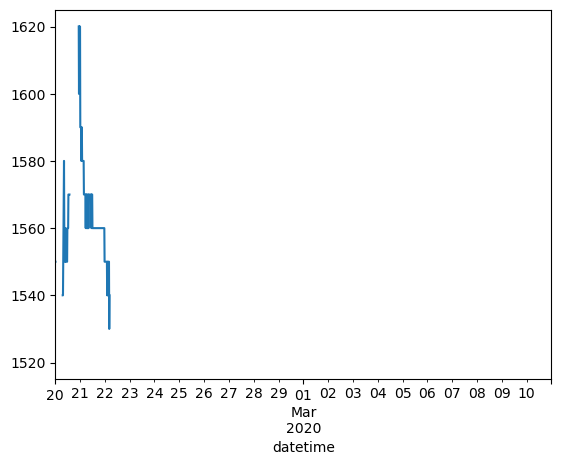

In [1809]:
data["00060"].loc["2020-2-20":"2020-3-10"].plot()

In [1814]:
# data1["00060"].loc["2020-2-20":"2020-3-10"]#.plot(marker=".")
data1["00060"].loc["2020-3-1"]

datetime
2020-03-01 00:30:00+00:00    1530.0
2020-03-01 02:30:00+00:00    1530.0
2020-03-01 04:30:00+00:00    1530.0
2020-03-01 06:30:00+00:00    1530.0
2020-03-01 08:30:00+00:00    1530.0
2020-03-01 10:30:00+00:00    1530.0
2020-03-01 12:30:00+00:00    1530.0
2020-03-01 14:30:00+00:00    1530.0
2020-03-01 16:30:00+00:00    1520.0
2020-03-01 18:30:00+00:00    1520.0
2020-03-01 20:30:00+00:00    1520.0
2020-03-01 22:30:00+00:00    1520.0
Name: 00060, dtype: float64

In [1873]:
pd.DatetimeIndex(["2022-1-1T00:15","2022-1-1T00:45"]).freq = "15T"

ValueError: Inferred frequency None from passed values does not conform to passed frequency 15T

In [1866]:
data1["00060"].index.freq = "15T"


ValueError: Inferred frequency None from passed values does not conform to passed frequency 15T

<AxesSubplot:xlabel='datetime'>

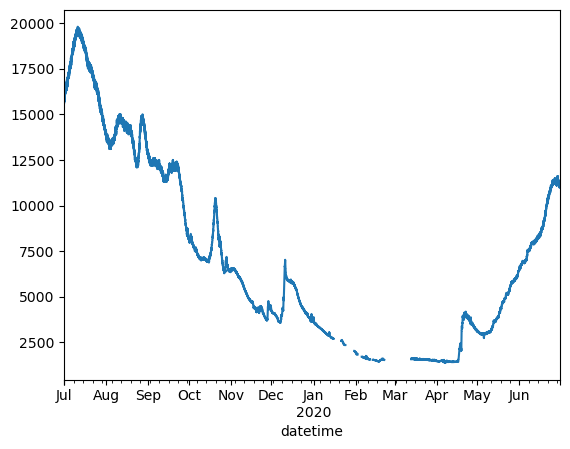

In [1805]:
discharge_data.plot()

<AxesSubplot:xlabel='datetime'>

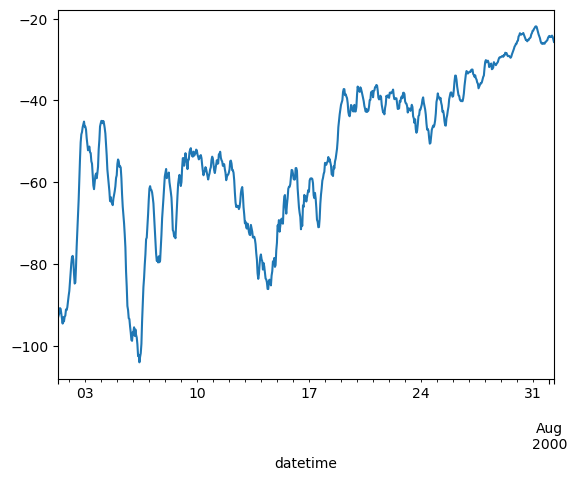

In [1783]:
df = find_discharge("15284000", "2000-7-1", "2000-7-31")
df.plot()

<AxesSubplot:xlabel='datetime'>

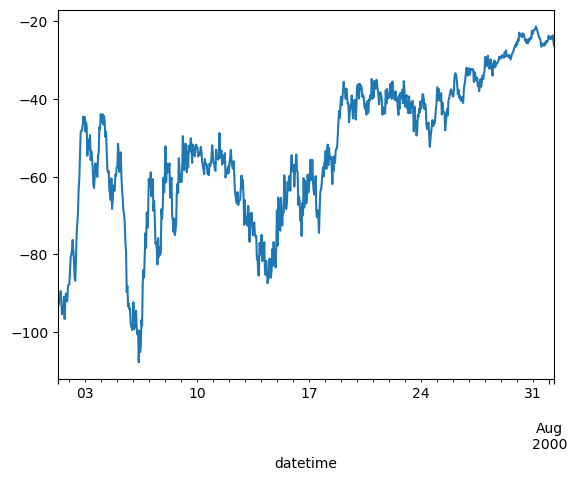

In [1780]:
df = find_discharge("15284000", "2000-7-1", "2000-7-31")
df.plot()

<AxesSubplot:xlabel='datetime'>

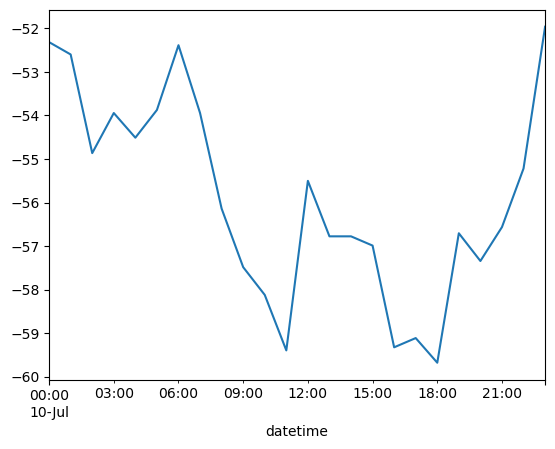

In [1781]:
df.loc["2000-7-10"].plot()

# Example for why I am rolling-mean the gage data

In [1763]:
start = "2010-12-1T00:00Z"
end = "2011-2-1T00:00Z"

station_discharge, station_temp = {}, {}
for station in stations:
    print(station)
    station_discharge[station] = find_discharge(station, start, end)
    # station_temp[station] = find_temp(station, start, end)


15276000
Using gage data for station 15276000.
Extrapolating ratingData upward for station 15276000.
15290000
Using gage data for station 15290000.
15271000
Using gage data for station 15271000.
15239900
Using stats for station 15239900
15281000
Using stats for station 15281000
15295700
Using gage data for station 15295700.
15239070
Using gage data for station 15239070.
15275100
Using gage data for station 15275100.
Extrapolating ratingData downward for station 15275100.
min data value: 1.6, min INDEP value is 1.75
15266300
Using gage data for station 15266300.
15284000
Using gage data for station 15284000.
15292780
Using stats for station 15292780
15274600
Using gage data for station 15274600.


15276000
15290000
15271000
15239900
15281000
15295700
15239070
15275100
15266300
15284000
15292780
15274600


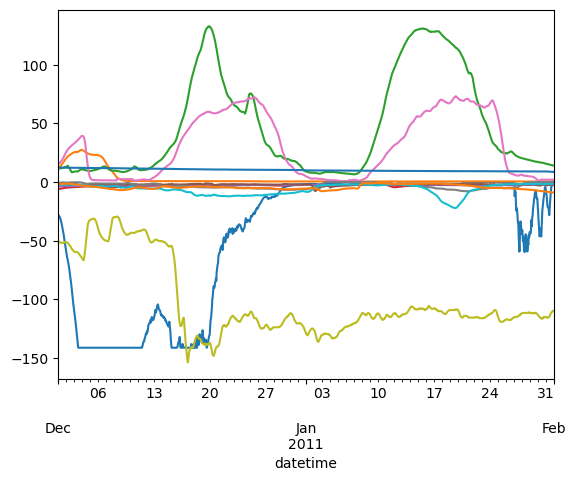

In [1764]:
for station in stations:
    print(station)
    station_discharge[station].plot()

15276000
15290000
15271000
15239900
15281000
15295700
15239070
15275100
15266300
15284000
15292780
15274600


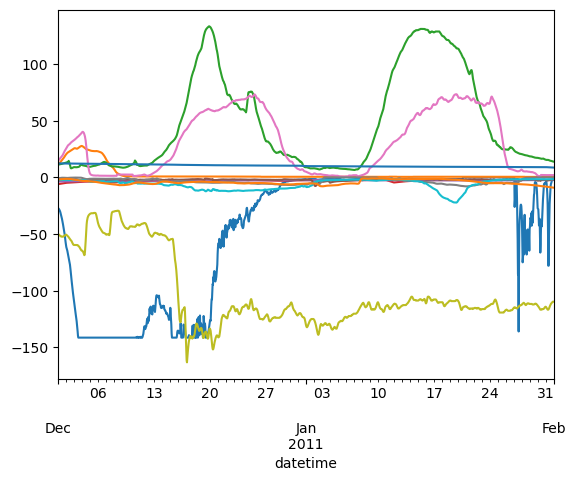

In [1759]:
for station in stations:
    print(station)
    station_discharge[station].plot()

15276000
15290000
15271000
15239900
15281000
15295700
15239070
15275100
15266300
15284000
15292780
15274600


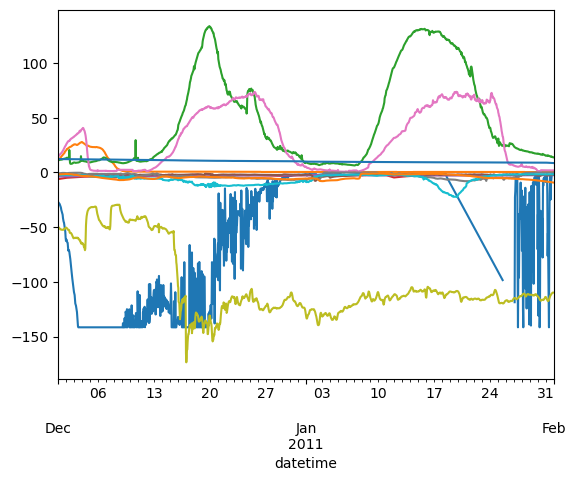

In [1751]:
for station in stations:
    print(station)
    station_discharge[station].plot()

# Compare with river files

In [2707]:
# found these by visual inspection of the `river_transport` variable which has negative signs on the
# 0s so I could read them off there.
river_sign = [-1, 1, -1, -1, -1, 1, -1, -1, -1, -1, 
              -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
              -1, -1, -1, -1, -1, -1, -1, -1, -1, 1,
              1, 1, 1, 1, 1, 1]

stations = ['15276000', '15290000', '15271000', '15239900', '15281000', '15295700',
            '15239070', '15275100', '15266300', '15284000', '15292780', '15274600']

station_list_file = ['15295700', '15239070', '15239900', '15266300', '15266300',
                     '15271000', '15274600', '15275100', '15276000', '15281000',
                     '15281000', '15281000', '15281000', '15281000', '15281000',
                     '15281000', '15281000', '15281000', '15281000', '15284000',
                     '15284000', '15284000', '15284000', '15284000', '15284000',
                     '15284000', '15284000', '15284000', '15284000', '15290000',
                     '15290000', '15292780', '15292780', '15292780', '15292780', '15292780']

# station "in model": station actually used
discharge_stations = {'15276000': "15276000", '15290000': "15290000", 
                      '15271000': "15271000", '15239900': "15239900", 
                      '15281000': "15281000", '15295700': "15295700",
                      '15239070': "15239070", '15275100': "15275100", 
                      '15266300': "15266300", '15284000': "15284000", 
                      '15292780': "15292000", '15274600': "15274600"}

# station "in model": station actually used
temp_stations = {'15276000': "15276000", '15290000': "15290000", 
                      '15271000': "15258000", '15239900': "15239900", 
                      '15281000': "15284000", '15295700': "15295700",
                      '15239070': "15239070", '15275100': "15276000", 
                      '15266300': "15266300", '15284000': "15284000", 
                      '15292780': "15292780", '15274600': "15276000"}

nsrho = 30  # number depths
nrivers = len(station_list_file) 


In [2978]:
def create_river_forcing_file(start, end, ndays, window=24, skip_last=False):
        
    # create arrays to input in the netcdf files
    index = pd.date_range(start.replace("Z",""), end.replace("Z",""), freq="1H")

    if skip_last:
        index = index[:-1]
        end = index[-1].isoformat()[:16]
    ntimes = len(index)

    # get river data for the time period
    station_discharge, station_temp = {}, {}
    for station in discharge_stations.values():
        station_discharge[station] = find_discharge(station, start, end, ndays, window=window)
    for station in temp_stations.values():
        station_temp[station] = find_temp(station, start, end, ndays, window=window)

    river_transport = np.zeros((ntimes, nrivers))
    river_temp = np.zeros((ntimes, nsrho, nrivers))

    # stations are repeated in a certain order in station_list_file
    for i, station_file in enumerate(station_list_file):
        if discharge_stations[station_file] == "15292780":
            factor = 2
        else:
            factor = 1
        nrepeats = station_list_file.count(station_file)
        river_transport[:,i] = factor*river_sign[i]*station_discharge[discharge_stations[station_file]]/nrepeats
        river_temp[:,:,i] = station_temp[temp_stations[station_file]].values[:,np.newaxis].repeat(nsrho, axis=1)

    # create netcdf files starting from the acquired data
    loc = 'nos.ciofs.river.20221216.t00z (1).nc'
    ds = xr.open_dataset(loc)
    
    vars_to_keep = ["river_names", "river_Xposition", "river_Eposition", "river_direction",
    "river_flag", "river_sign", "river_Vshape"]
    dsnew = ds[vars_to_keep].copy(deep=True)

    # add new variables that include time
    dsnew["river_time"] = ("time", index)
    dsnew["river_transport"] = (("time","river"), river_transport)
    dsnew["river_transport"] = dsnew["river_transport"].astype(np.float32)
    dsnew["river_temp"] = (("time","s_rho","river"), river_temp)
    dsnew["river_temp"] = dsnew["river_temp"].astype(np.float32)
    dsnew["river_salt"] = xr.full_like(dsnew["river_temp"], 0.005)
    dsnew["river_pass"] = xr.full_like(dsnew["river_temp"], 9.96921e+36)
    new_vars = ["river_time", "river_transport", "river_temp", "river_salt", "river_pass"]
    for var in new_vars:
        dsnew[var].attrs = ds[var].attrs
    
    # Update global attributes
    dsnew.attrs["data_source"] = "River discharge from USGS real time, estimated using gage height and rating curve, or from daily statistical mean."
    dsnew.attrs["Temp_source"] = "River T from USGS real time or daily statistical mean."
    dsnew.attrs["Salt_source"] = "Always 0.005"
    dsnew.attrs["institution"] = "Axiom Data Science"
    now = str(pd.Timestamp.now())
    dsnew.attrs["history"] = f"Created {now}. Run using `dataretrieval-python` package and code from Axiom Data Science."
    fname = pd.Timestamp(start).strftime("axiom.ciofs.river.%Y%m%d.nc")
    dsnew.attrs["output_file"] = f"River Forcing file: {fname}"
    dsnew.attrs["source_code"] = "Created using create_river_roms.py."
    dsnew.attrs["reference"] = "Created by Kristen M. Thyng, Axiom Data Science."

    return dsnew, fname


In [2673]:
start = "2008-11-1T00:00Z"
end = "2008-11-7T00:00Z"


# get river data for the time period
station_discharge, station_temp = {}, {}
for station in discharge_stations.values():
    station_discharge[station] = find_discharge(station, start, end)
for station in temp_stations.values():
    station_temp[station] = find_temp(station, start, end)
    
# create arrays to input in the netcdf files
index = pd.date_range(start, end, freq="1H")
ntimes = len(index)
nsrho = 30
nrivers = len(station_list_file)

river_transport = np.zeros((ntimes, nrivers))
river_temp = np.zeros((ntimes, nsrho, nrivers))

# stations are repeated in a certain order in station_list_file
for i, station_file in enumerate(station_list_file):
    nrepeats = station_list_file.count(station_file)
    river_transport[:,i] = river_sign[i]*station_discharge[discharge_stations[station_file]]/nrepeats
    river_temp[:,:,i] = station_temp[temp_stations[station_file]].values[:,np.newaxis].repeat(nsrho, axis=1)


# create netcdf files from the acquired data
loc = 'nos.ciofs.river.20221216.t00z (1).nc'
ds = xr.open_dataset(loc)



Using gage data for station 15276000.
Extrapolating ratingData upward for station 15276000.
max data value: 7.86, max INDEP value is 7.15
Using gage data for station 15290000.
Using gage data for station 15271000.
calculating mean time series
calculating mean time series
Using gage data for station 15284000.
calculating mean time series
Using gage data for station 15274600.
calculating mean time series
calculating mean time series
calculating mean time series
calculating mean time series
calculating mean time series
calculating mean time series
calculating mean time series
calculating mean time series
calculating mean time series
calculating mean time series
calculating mean time series


In [2701]:
vars_to_keep = ["river_names", "river_Xposition", "river_Eposition", "river_direction",
    "river_flag", "river_sign", "river_Vshape"]
dsnew = ds[vars_to_keep].copy(deep=True)

# add new variables that include time
dsnew["river_time"] = index
dsnew["river_transport"] = (("time","river"), river_transport)
dsnew["river_transport"] = dsnew["river_transport"].astype(np.float32)
dsnew["river_temp"] = (("time","s_rho","river"), river_temp)
dsnew["river_temp"] = dsnew["river_temp"].astype(np.float32)
dsnew["river_salt"] = xr.full_like(dsnew["river_temp"], 0.005)
dsnew["river_pass"] = xr.full_like(dsnew["river_temp"], 9.96921e+36)
new_vars = ["river_time", "river_transport", "river_temp", "river_salt", "river_pass"]
for var in new_vars:
    dsnew[var].attrs = ds[var].attrs
dsnew


<xarray.Dataset>
Dimensions:          (river: 36, s_rho: 30, river_time: 145, time: 145)
Coordinates:
  * river            (river) int32 1 2 3 4 5 6 7 8 9 ... 29 30 31 32 33 34 35 36
  * river_time       (river_time) object 1225497600000000000 ... 122601600000...
Dimensions without coordinates: s_rho, time
Data variables:
    river_names      (river) |S46 ...
    river_Xposition  (river) int32 ...
    river_Eposition  (river) int32 ...
    river_direction  (river) int32 ...
    river_flag       (river) int32 ...
    river_sign       (river) float32 ...
    river_Vshape     (s_rho, river) float32 ...
    river_transport  (time, river) float32 -4.147 2.056 -5.991 ... 17.93 17.93
    river_temp       (time, s_rho, river) float32 3.584 2.477 1.353 ... 1.0 1.0
    river_salt       (time, s_rho, river) float32 0.005 0.005 ... 0.005 0.005
    river_pass       (time, s_rho, river) float32 9.969e+36 ... 9.969e+36
Attributes:
    type:             ROMS river forcing netCDF file
    title:            ciofs River forcing netCDF file
    data_source:      River discharge from USGS real time or daily mean
    Temp_source:      River T from USGS real time or daily mean, Salt=0
    model_grid_file:  GRID file: nos.ciofs.romsgrid.nc
    output_file:      River Forcing file: nos.ciofs.river.20221216.t00z.nc
    source_code:      Created using nos_ofs_create_river_ROMS.sh
    history:          Created at time 00:52  12/16/2022
    reference:        Created by Aijun Zhang, OD/CO-OPS/NOS/NOAA

Compare with one file

fill over 2 days with function
Using gage data for station 15276000.
Extrapolating ratingData upward for station 15276000.
max data value: 8.91, max INDEP value is 7.15
fill over 2 days with function
Using gage data for station 15290000.
fill over 2 days with function
Using gage data for station 15271000.
fill over 2 days with function
calculating mean time series
calculating mean time series
fill over 2 days with function
Using gage data for station 15239070.
fill over 2 days with function
Using gage data for station 15275100.
fill over 2 days with function
Using gage data for station 15266300.
fill over 2 days with function
Using gage data for station 15284000.
Extrapolating ratingData downward for station 15284000.
min data value: 0.0, min INDEP value is 0.1
fill over 2 days with function
Using gage data for station 15292000.
Extrapolating ratingData downward for station 15292000.
min data value: 0.0, min INDEP value is 4.5
fill over 2 days with function
Using gage data for station 

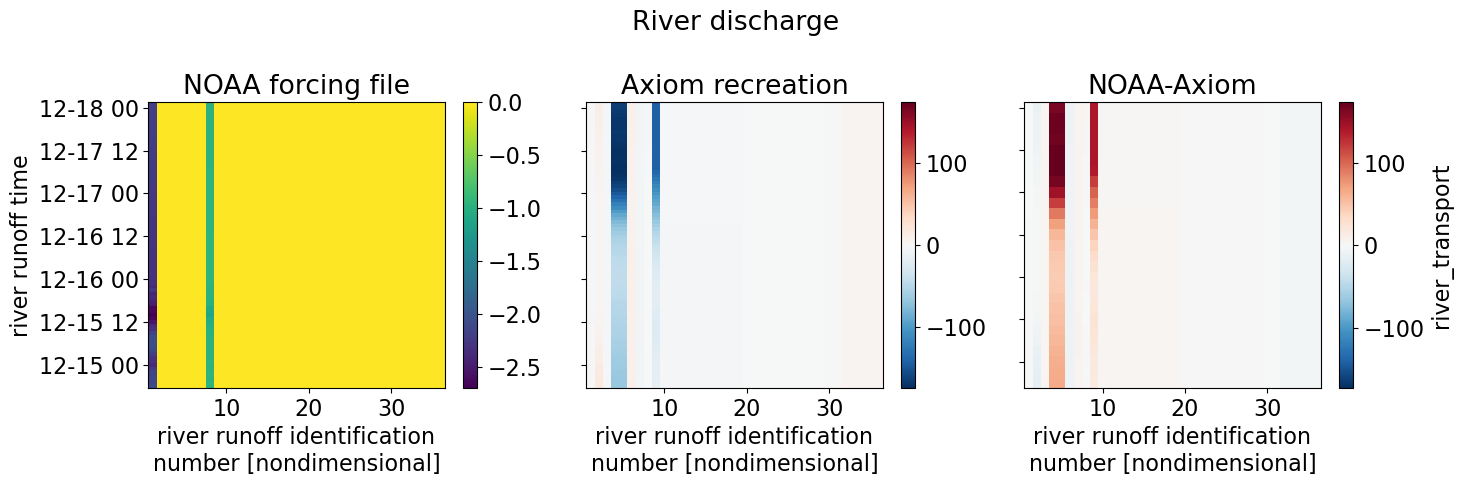

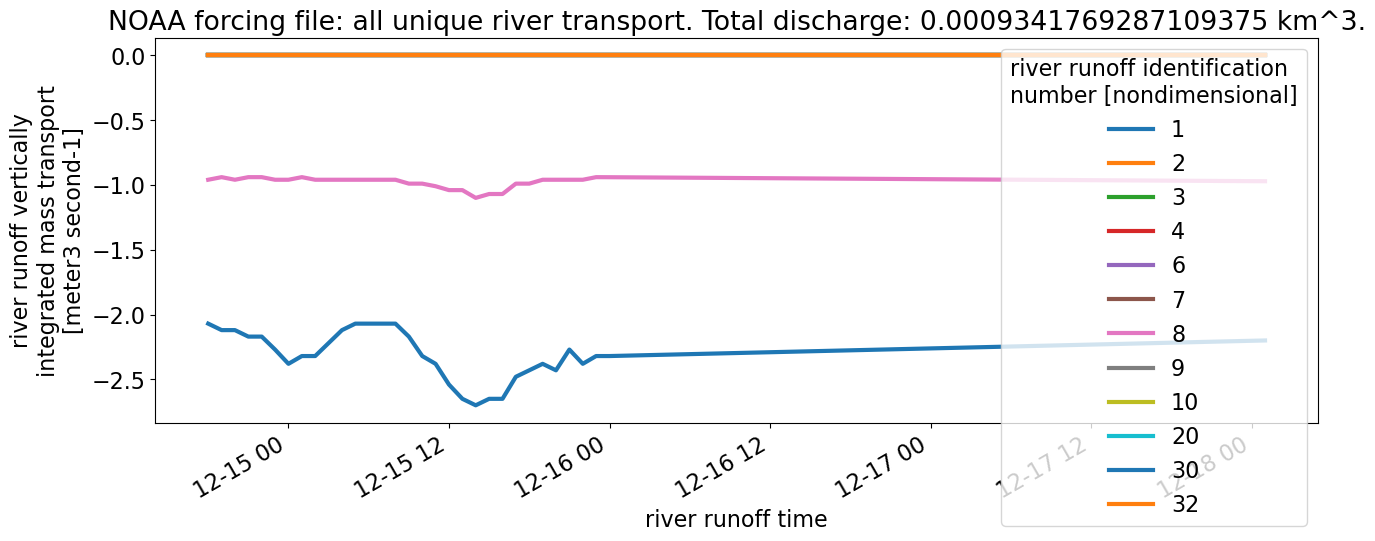

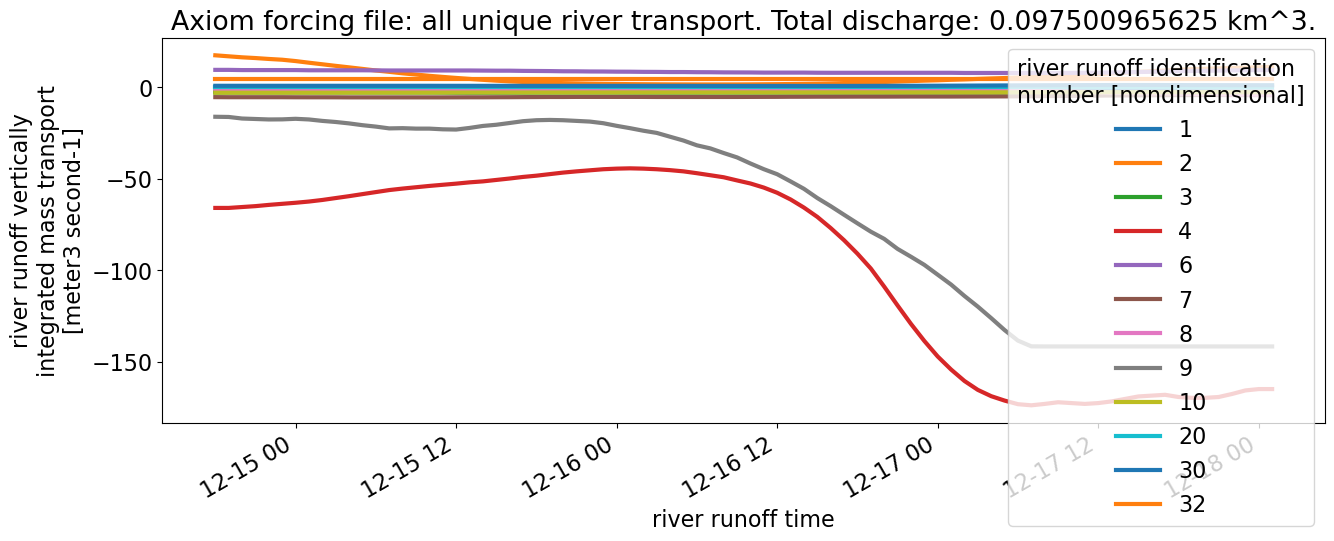

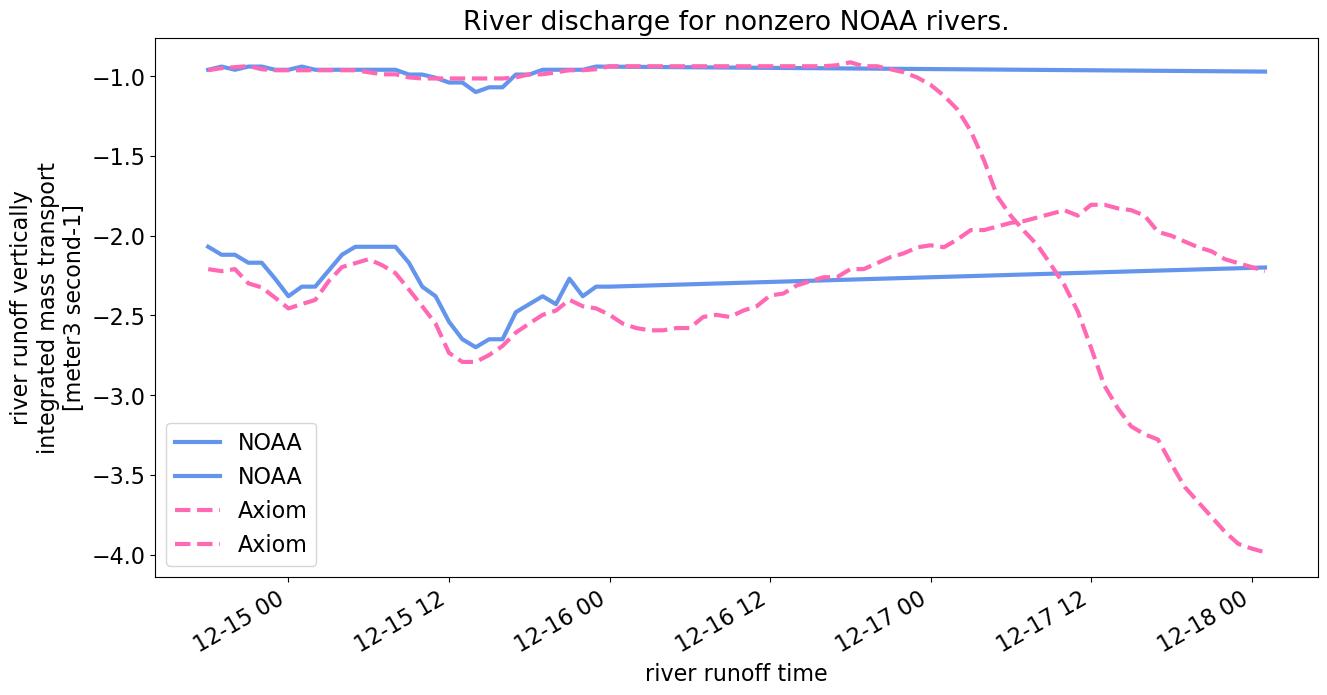

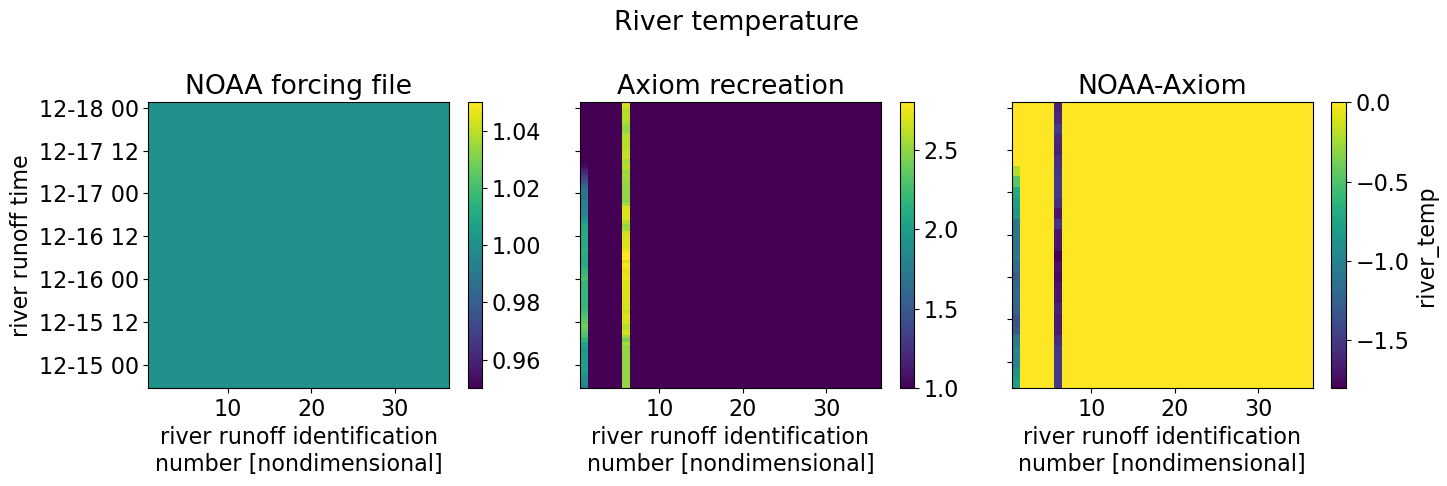

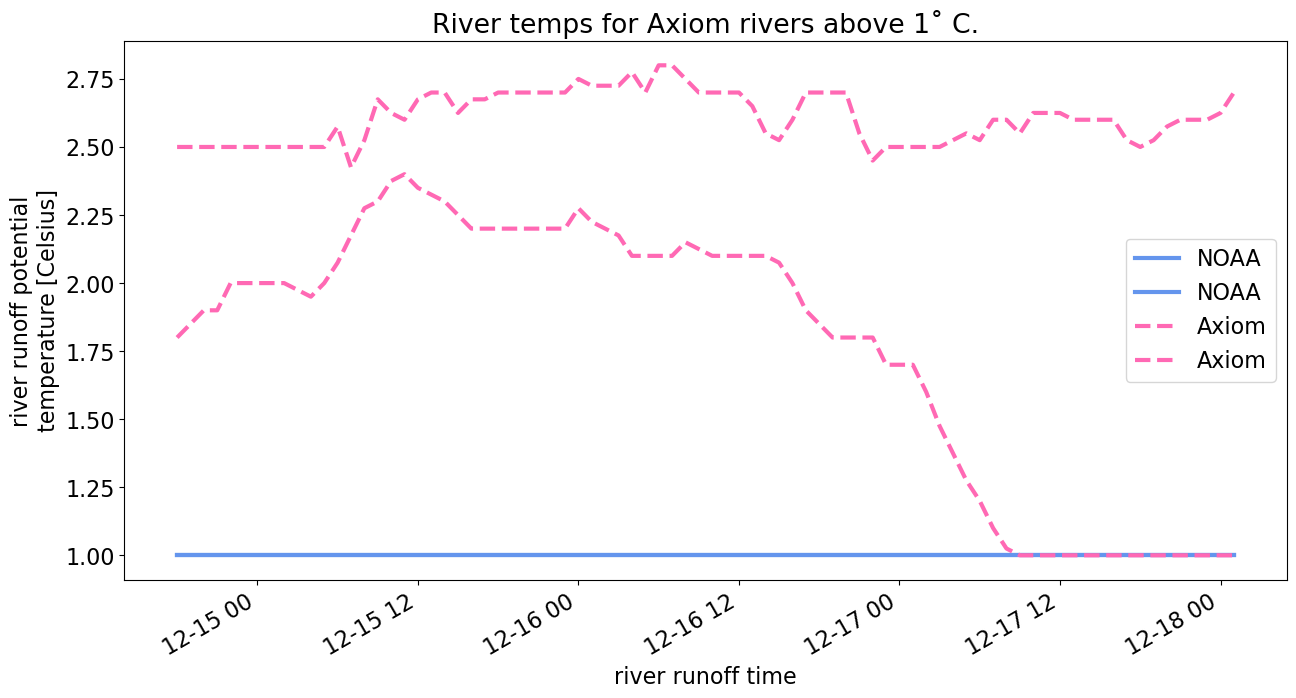

In [2952]:
loc = 'nos.ciofs.river.20221216.t00z (1).nc'
ds = xr.open_dataset(loc)

start = pd.Timestamp(ds["river_time"].values[0]).strftime("%Y-%m-%dT%H:%MZ")
end = pd.Timestamp(ds["river_time"].values[-1]).strftime("%Y-%m-%dT%H:%MZ")

dscompare = create_river_forcing_file(start, end, ndays=2, window=1)

ds = ds.swap_dims({"time": "river_time"})
dscompare = dscompare.swap_dims({"time": "river_time"})

plot_comparison(ds, dscompare)


fill over 2 days with function
Using gage data for station 15276000.
fill over 2 days with function
Using gage data for station 15290000.
fill over 2 days with function
Using gage data for station 15271000.
fill over 2 days with function
calculating mean time series
calculating mean time series
fill over 2 days with function
Using gage data for station 15266300.
fill over 2 days with function
Using gage data for station 15284000.
Extrapolating ratingData downward for station 15284000.
min data value: 0.0, min INDEP value is 0.1
fill over 2 days with function
Using gage data for station 15292000.
Extrapolating ratingData downward for station 15292000.
min data value: 0.0, min INDEP value is 4.5
fill over 2 days with function
Using gage data for station 15274600.
calculating mean time series
calculating mean time series
calculating mean time series
calculating mean time series


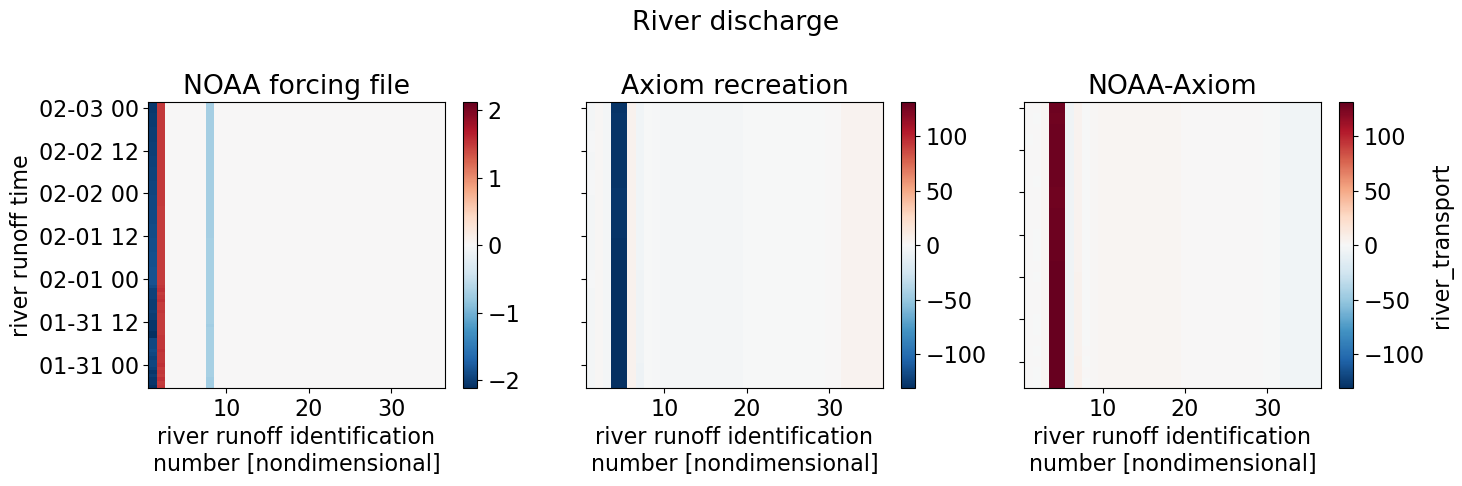

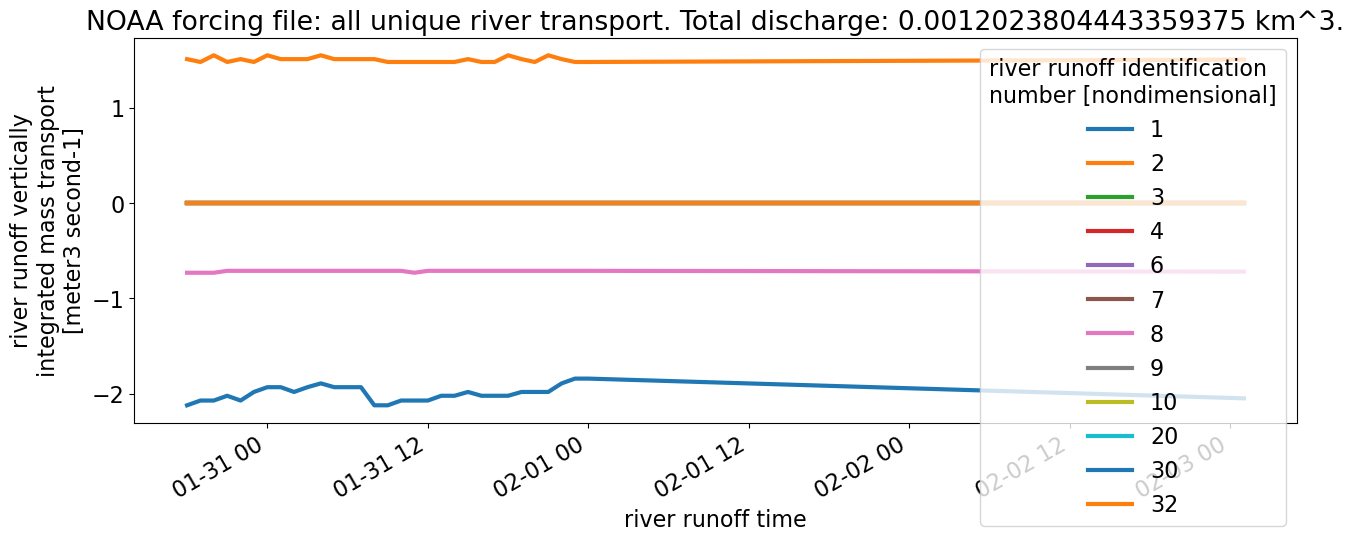

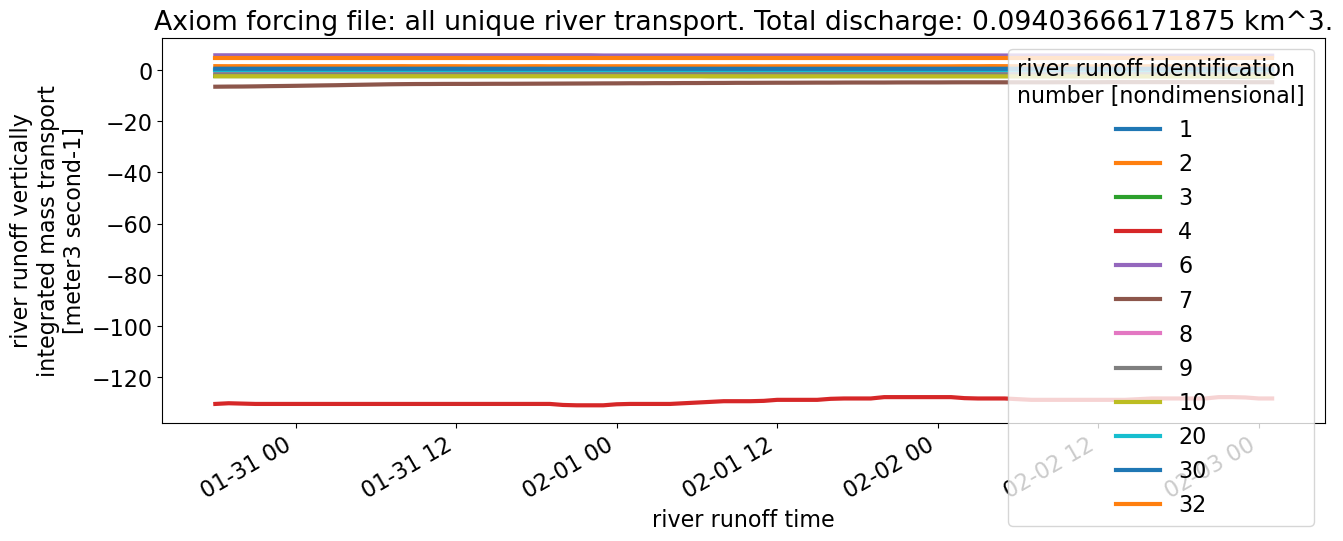

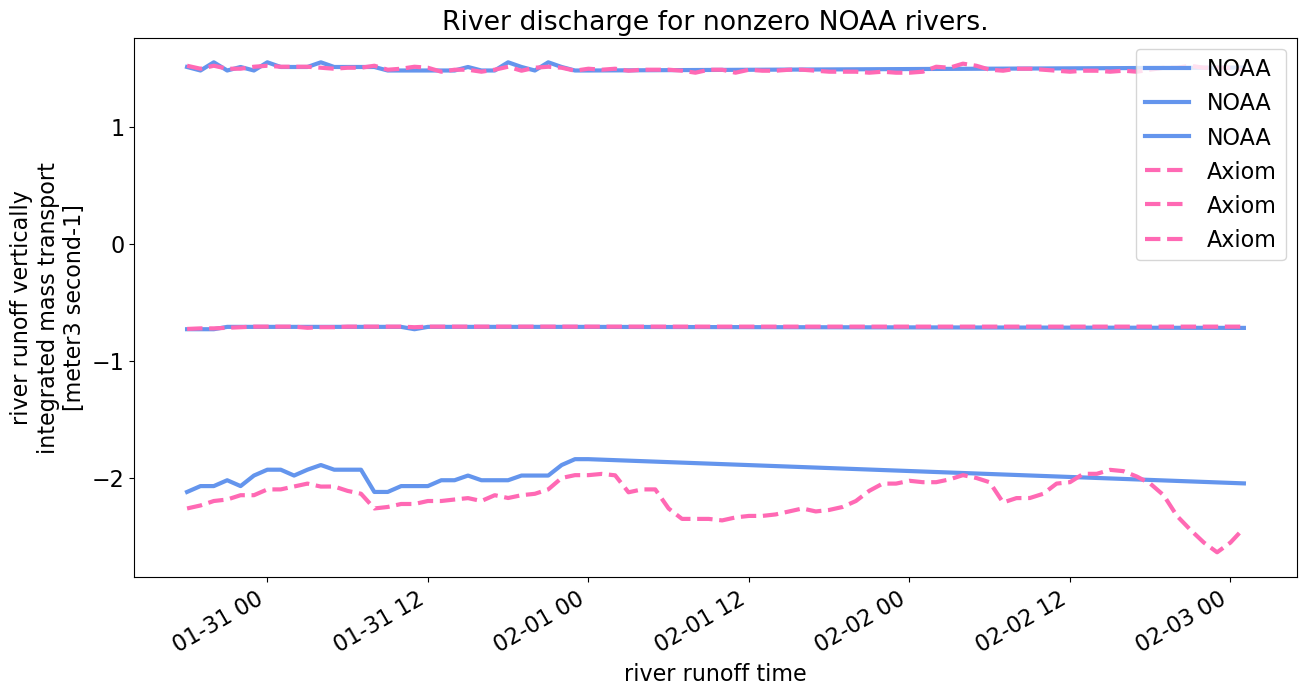

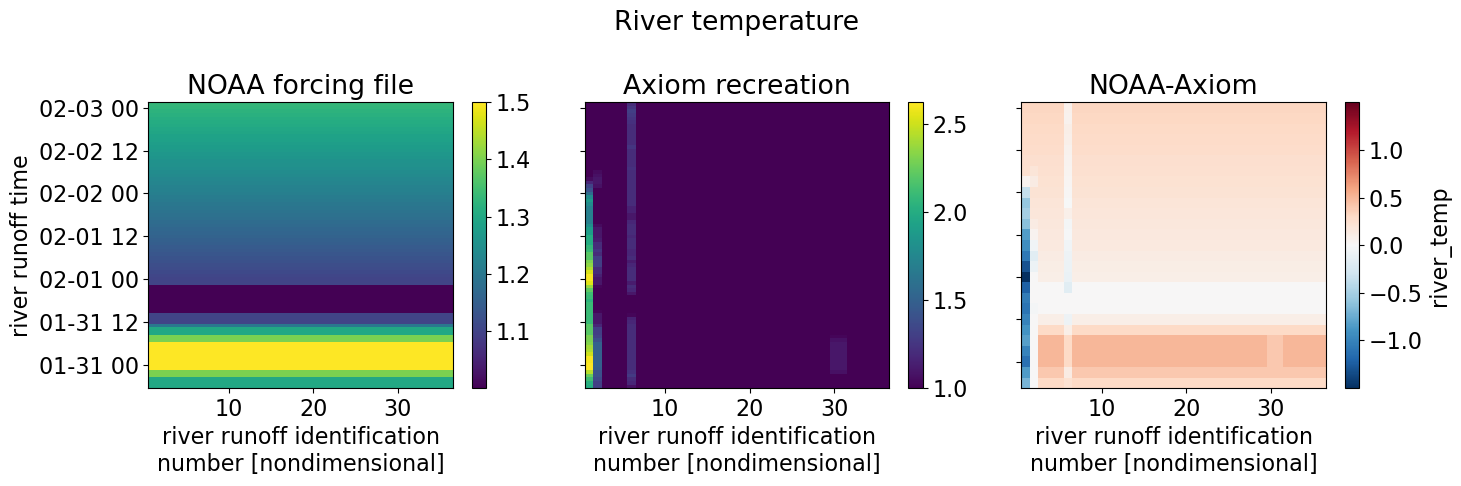

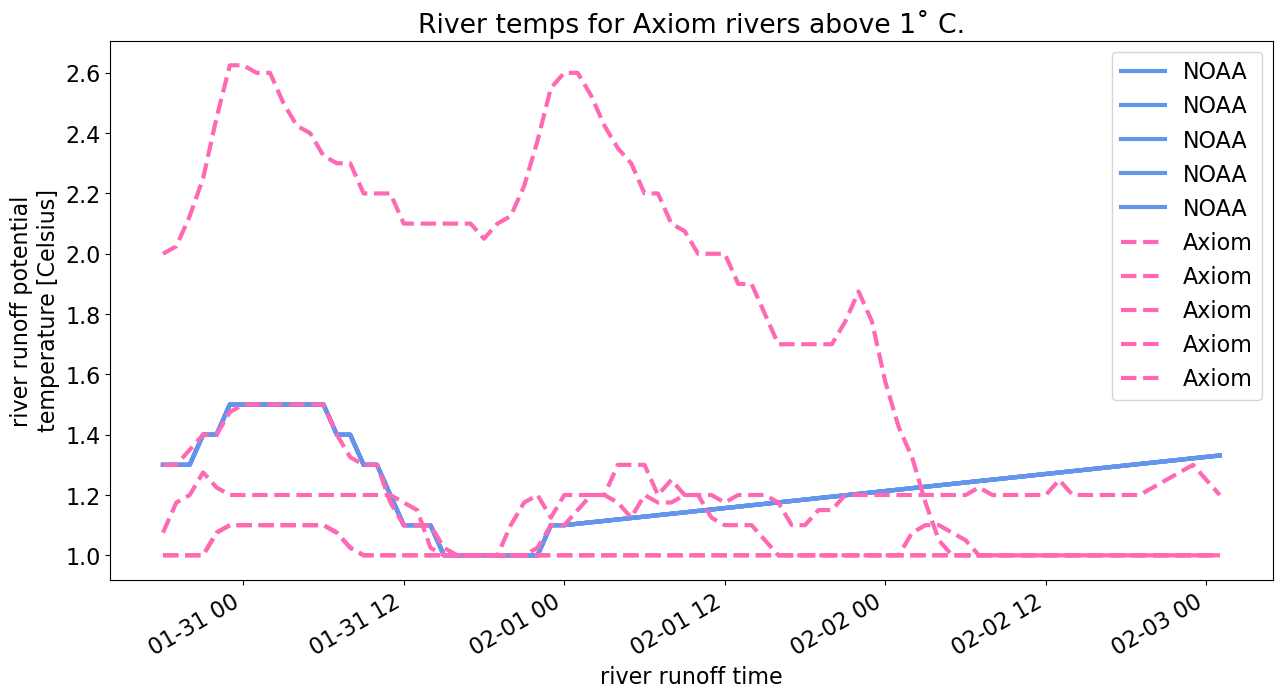

In [2953]:
loc = "nos.ciofs.river.20230201.t00z.nc"
ds = xr.open_dataset(loc)

start = pd.Timestamp(ds["river_time"].values[0]).strftime("%Y-%m-%dT%H:%MZ")
end = pd.Timestamp(ds["river_time"].values[-1]).strftime("%Y-%m-%dT%H:%MZ")

dscompare = create_river_forcing_file(start, end, ndays=2, window=1)

ds = ds.swap_dims({"time": "river_time"})
dscompare = dscompare.swap_dims({"time": "river_time"})

plot_comparison(ds, dscompare)


In [2951]:
def plot_comparison(ds, dscompare):
    
    plt.rc('font', size=16)
    
    color_noaa = "cornflowerblue"
    color_axiom = "hotpink"
    kwargs_line = {"x": "river_time", "lw": 3}
    kwargs_noaa = {"color": color_noaa, "label": "NOAA"}
    kwargs_axiom = {"color": color_axiom, "label": "Axiom", "ls": "--"}
    
    fig, axes = plt.subplots(1, 3, figsize=(15,5))
    ds["river_transport"].plot(ax=axes[0], cbar_kwargs={"label": ""})
    dscompare["river_transport"].plot(ax=axes[1], cbar_kwargs={"label": ""})
    (ds["river_transport"] - dscompare["river_transport"]).plot(ax=axes[2])
    axes[0].set_title("NOAA forcing file")
    axes[1].set_title("Axiom recreation")
    axes[1].set_ylabel("")
    axes[1].set_yticklabels("")
    axes[2].set_title("NOAA-Axiom")
    axes[2].set_ylabel("")
    axes[2].set_yticklabels("")
    fig.suptitle("River discharge")
    plt.tight_layout()

    noaa_discharge = float(abs(ds['river_transport']).sum()*3600/1000**3)  # m^3/s * 3600 s for hour * (1km/1000m)^3
    axiom_discharge = float(abs(dscompare['river_transport']).sum()*3600/1000**3)  # m^3/s * 3600 s for hour

    unique_inds = list(set([station_list_file.index(station_list_file[i]) for i in range(nrivers)]))
    ds["river_transport"].isel(river=unique_inds).plot.line(**kwargs_line, figsize=(15,5));
    plt.title(f"NOAA forcing file: all unique river transport. Total discharge: {noaa_discharge} km^3.")
    dscompare["river_transport"].isel(river=unique_inds).plot.line(**kwargs_line, figsize=(15,5));
    plt.title(f"Axiom forcing file: all unique river transport. Total discharge: {axiom_discharge} km^3.")

    # print(f"NOAA forcing file total freshwater: {}")
    # print(f"Axiom forcing file total freshwater: {abs(dscompare['river_transport']).sum()*3600}")

    # pull over rivers that have nonzero transport from original file
    ibool = abs(ds["river_transport"].sum(dim="river_time")) > 0
    ind = ds["river"][ibool] - 1
    key = "river_transport"
    ds[key].isel(river=ind).plot.line(**kwargs_line, **kwargs_noaa, figsize=(15,7));
    dscompare[key].isel(river=ind).plot.line(**kwargs_line, **kwargs_axiom);
    plt.legend()
    plt.title("River discharge for nonzero NOAA rivers.")

    fig, axes = plt.subplots(1, 3, figsize=(15,5))
    ds["river_temp"].isel(s_rho=0).plot(ax=axes[0], cbar_kwargs={"label": ""})
    dscompare["river_temp"].isel(s_rho=0).plot(ax=axes[1], cbar_kwargs={"label": ""})
    (ds["river_temp"] - dscompare["river_temp"]).isel(s_rho=0).plot(ax=axes[2])
    axes[0].set_title("NOAA forcing file")
    axes[1].set_title("Axiom recreation")
    axes[1].set_ylabel("")
    axes[1].set_yticklabels("")
    axes[2].set_title("NOAA-Axiom")
    axes[2].set_ylabel("")
    axes[2].set_yticklabels("")
    fig.suptitle("River temperature")
    plt.tight_layout()

    # pull over rivers that have non-one temp from Axiom file
    ibool = (dscompare["river_temp"].isel(s_rho=0) > 1).any(dim="river_time")
    ind = dscompare["river"][ibool] - 1

    key = "river_temp"
    ds[key].isel(s_rho=0, river=ind).plot.line(**kwargs_line, **kwargs_noaa, figsize=(15,7));
    dscompare[key].isel(s_rho=0, river=ind).plot.line(**kwargs_line, **kwargs_axiom);
    plt.legend()
    plt.title("River temps for Axiom rivers above 1˚ C.")
        

# Make example forcing file for Chang

to test with

In [2949]:
start, end = "1998-1-1T00:00", "1998-1-5T00:00"

ds = create_river_forcing_file(start, end, ndays=2)
ds.to_netcdf("test_river_forcing_file.nc")

calculating mean time series
calculating mean time series
calculating mean time series
calculating mean time series
calculating mean time series
calculating mean time series
calculating mean time series
calculating mean time series
calculating mean time series
calculating mean time series
calculating mean time series
calculating mean time series
calculating mean time series
calculating mean time series
calculating mean time series
calculating mean time series
calculating mean time series
calculating mean time series
calculating mean time series
calculating mean time series
calculating mean time series
calculating mean time series
calculating mean time series


# Make monthly forcing files for 1998 and check them

In [2996]:
{
    "tags": [
        "hide-output"
    ]
}

# start_overall, end_overall = "1998-1-1T00:00", "1998-12-31T23:00"
year = 1998
for i in range(1,13):
    if i == 12:
        start, end = f"{year}-{i}-1T00", f"{year+1}-{1}-1T00"
    else:
        start, end = f"{year}-{i}-1T00", f"{year}-{i+1}-1T00"

    ds, fname = create_river_forcing_file(start, end, ndays=8, skip_last=True)
    ds.to_netcdf(fname)


Processing discharge for station 15276000 from 1998-1-1T00 to 1998-01-31T23:00.
Accessed discharge data.
Accessed gage data.
Gage dataset is empty. Use mean time series.
calculating mean time series
fill consecutive nan gaps of over 8 days with function <function discharge_from_gage_or_mean at 0x7fe326134b80>.
Dates replaced: DatetimeIndex(['1998-01-01 00:00:00', '1998-01-01 00:15:00',
               '1998-01-01 00:30:00', '1998-01-01 00:45:00',
               '1998-01-01 01:00:00', '1998-01-01 01:15:00',
               '1998-01-01 01:30:00', '1998-01-01 01:45:00',
               '1998-01-01 02:00:00', '1998-01-01 02:15:00',
               ...
               '1998-01-30 06:30:00', '1998-01-30 06:45:00',
               '1998-01-30 07:00:00', '1998-01-30 07:15:00',
               '1998-01-30 07:30:00', '1998-01-30 07:45:00',
               '1998-01-30 08:00:00', '1998-01-30 08:15:00',
               '1998-01-30 08:30:00', '1998-01-30 08:45:00'],
              dtype='datetime64[ns]', leng

Plot output for sanity check

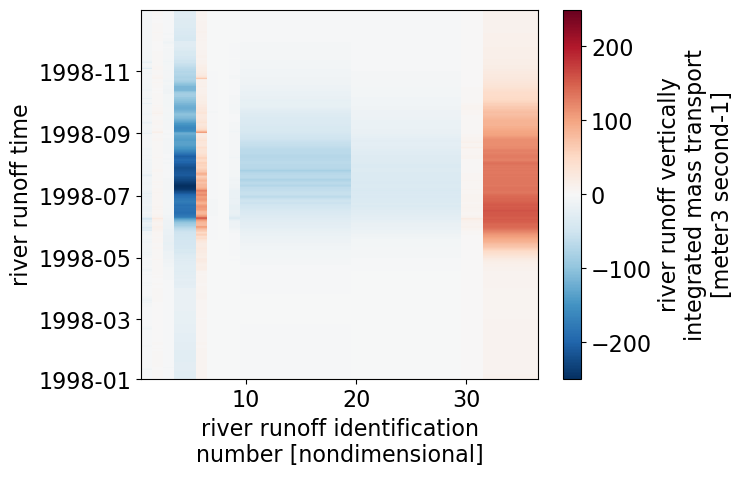

In [3001]:
locs = "axiom.ciofs.river.1998*.nc"
ds = xr.open_mfdataset(locs, concat_dim="time", combine='nested')
ds = ds.swap_dims({"time": "river_time"})
ds["river_transport"].plot()

# Demonstrate using the rating curve

In [1529]:
ratingDataOrig = nwis.get_ratings(site="15295700", file_type="exsa")[0]
ratingDataHigher = extrapolate_rating_curve(ratingDataOrig, ratingDataOrig["INDEP"].max() + 2, "up")
ratingDataLower = extrapolate_rating_curve(ratingDataOrig, ratingDataOrig["INDEP"].min() -1, "down")


<AxesSubplot:xlabel='INDEP'>

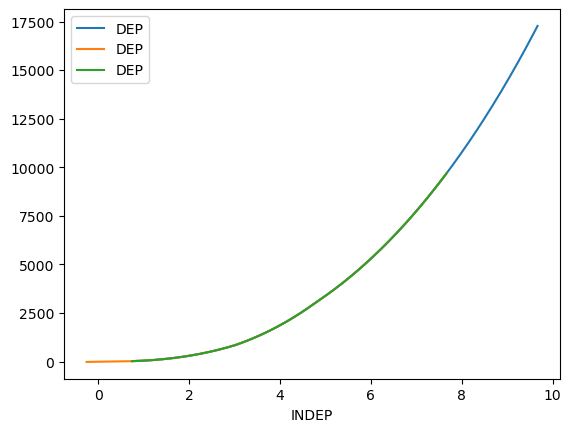

In [1530]:
ax = ratingDataHigher.plot(x="INDEP", y="DEP")
ratingDataLower.plot(x="INDEP", y="DEP", ax=ax)
ratingDataOrig.plot(x="INDEP", y="DEP", ax=ax)
# ax.set_ylim(-10, 100)

<AxesSubplot:xlabel='INDEP'>

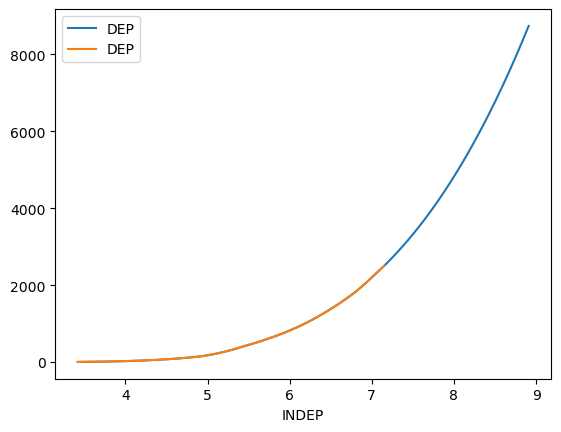

In [818]:
ax = dftest.plot(x="INDEP", y="DEP")
ratingData.plot(x="INDEP", y="DEP", ax=ax)


<AxesSubplot:xlabel='datetime'>

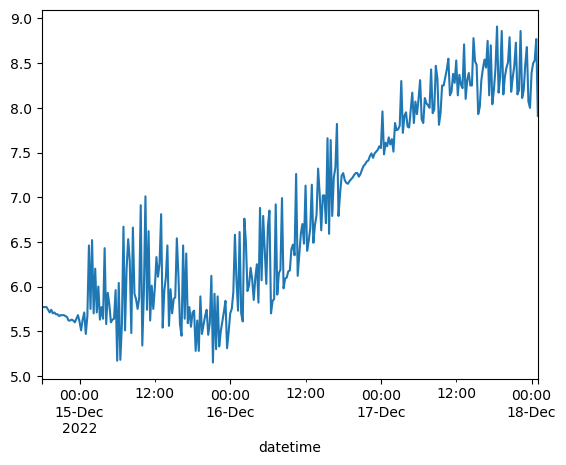

In [816]:
data["00065"].plot()

In [782]:
ratingData[["INDEP", "DEP"]],

INDEP      DEP
0     3.42     5.00
1     3.43     5.17
2     3.44     5.35
3     3.45     5.53
4     3.46     5.72
..     ...      ...
369   7.11  2417.14
370   7.12  2437.66
371   7.13  2458.30
372   7.14  2479.09
373   7.15  2500.00

[374 rows x 2 columns]

# Check the two nonzero rivers (later check the zero rivers too)

Should I always use gage data?

In [557]:
station = "15275100"
ratingData = nwis.get_ratings(site=station, file_type="base")
ratingData[0]

INDEP     DEP STOR
0   1.86    1.90    *
1   3.05  104.90    *
2   3.23  125.85    *
3   3.50  151.09    *
4   3.75  172.07    *
5   4.02  198.54    *
6   5.91  461.00    *

In [566]:
station = "15275100"
ratingData = nwis.get_ratings(site=station, file_type="exsa")
ratingData[0]

INDEP  SHIFT     DEP STOR
0     1.75   0.11    1.90  NaN
1     1.76   0.11    2.06  NaN
2     1.77   0.11    2.23  NaN
3     1.78   0.11    2.41  NaN
4     1.79   0.11    2.60  NaN
..     ...    ...     ...  ...
412   5.87   0.00  454.67  NaN
413   5.88   0.00  456.25  NaN
414   5.89   0.00  457.83  NaN
415   5.90   0.00  459.42  NaN
416   5.91   0.00  461.00    *

[417 rows x 4 columns]

In [582]:
station = "15275100"
ratingData = nwis.get_ratings(site=station, file_type="corr")
ratingData[0]

INDEP  CORR  CORRINDEP
0     1.75  0.03       1.78
1     1.76  0.03       1.79
2     1.77  0.03       1.80
3     1.78  0.03       1.81
4     1.79  0.03       1.82
..     ...   ...        ...
412   5.87  0.03       5.90
413   5.88  0.03       5.91
414   5.89  0.03       5.92
415   5.90  0.03       5.93
416   5.91  0.03       5.94

[417 rows x 3 columns]

In [573]:
dischargeh

datetime
2022-12-14 18:00:00   -999999.0
2022-12-14 19:00:00   -999999.0
2022-12-14 20:00:00   -999999.0
2022-12-14 21:00:00   -999999.0
2022-12-14 22:00:00   -999999.0
                         ...   
2022-12-17 21:00:00   -999999.0
2022-12-17 22:00:00   -999999.0
2022-12-17 23:00:00   -999999.0
2022-12-18 00:00:00   -999999.0
2022-12-18 01:00:00   -999999.0
Freq: H, Name: 00065, Length: 80, dtype: float64

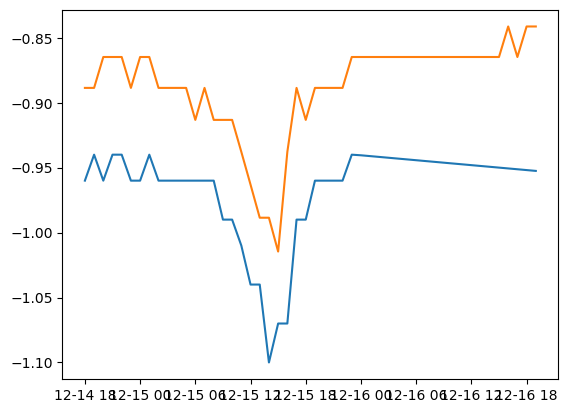

In [577]:
station = "15275100"
exsa = nwis.get_ratings(site=station, file_type="exsa")[0]
corr = nwis.get_ratings(site=station, file_type="corr")[0]
rating = pd.concat([exsa, corr], axis=1)
rating.set_index("CORRINDEP", inplace=True)
streamflow_as_function_of_gage_height = rating["DEP"]

discharge = nwis.get_iv(sites=station, parameterCd="00065", start=start, end=end)[0].tz_convert(None)
dischargeh = discharge["00065"].groupby(pd.Grouper(freq='1H')).mean("numeric_only")


streamflow_estimate_for_gage_data = -streamflow_as_function_of_gage_height.loc[dischargeh.round(2)]*.3048**3
# -ratingData[0].set_index("INDEP")["DEP"].loc[dischargeh.round(2)]*.3**3

streamflow_estimate_for_gage_data

plt.plot(index[:-30], ds["river_transport"][:,7][:-30])
plt.plot(index[:-30], streamflow_estimate_for_gage_data.iloc[:-30])

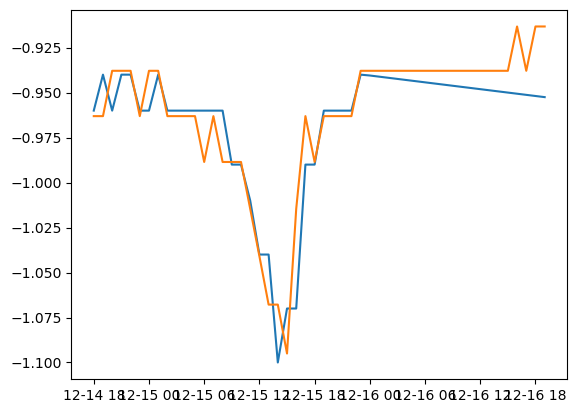

In [579]:
station = "15275100"
ratingData = nwis.get_ratings(site=station, file_type="exsa")
discharge = nwis.get_iv(sites=station, parameterCd="00065", start=start, end=end)[0].tz_convert(None)
dischargeh = discharge["00065"].groupby(pd.Grouper(freq='1H')).mean("numeric_only")
est = -ratingData[0].set_index("INDEP")["DEP"].loc[dischargeh.round(2)]*.3048**3

plt.plot(index[:-30], ds["river_transport"][:,7][:-30])
plt.plot(index[:-30], est.iloc[:-30])

What would it look like to use discharge if available and otherwise gage data, but on a point by point basis?

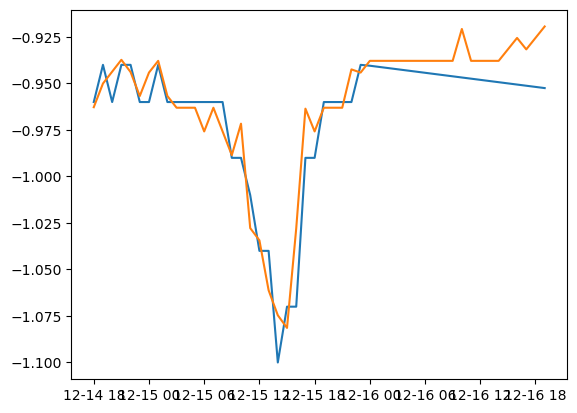

In [660]:
station = "15275100"

data = nwis.get_iv(sites=station, parameterCd=["00060","00065"], start=start, end=end)[0].tz_convert(None)
discharge_data = -data["00060"]*.3048**3

ratingData = nwis.get_ratings(site=station, file_type="exsa")[0]

# create estimate using rating curve and gage height
streamflow_estimate_for_gage_data = -ratingData.set_index("INDEP")["DEP"].loc[data["00065"].round(2)]*.3048**3

# combine. Will also need to combine for ice values and other scenarios.
streamflow_estimate_for_gage_data.index = discharge_data.index
discharge_data.loc[discharge_data.isnull()] = streamflow_estimate_for_gage_data.loc[discharge_data.isnull()]

# average to hourly
dischargeh = discharge_data.groupby(pd.Grouper(freq='1H')).mean("numeric_only")

# est = -ratingData[0].set_index("INDEP")["DEP"].loc[dischargeh.round(2)]*.3048**3

plt.plot(index[:-30], ds["river_transport"][:,7][:-30])
plt.plot(index[:-30], dischargeh.iloc[:-30])

In [652]:
streamflow_estimate_for_gage_data.set_index(discharge_data.index)

AttributeError: 'Series' object has no attribute 'set_index'

In [658]:
discharge_data, streamflow_estimate_for_gage_data

(datetime
 2022-12-14 18:00:00   -0.962773
 2022-12-14 18:15:00   -0.962773
 2022-12-14 18:30:00   -0.962773
 2022-12-14 18:45:00   -0.962773
 2022-12-14 19:00:00   -0.937288
                          ...   
 2022-12-18 00:00:00   -4.056388
 2022-12-18 00:15:00   -4.080174
 2022-12-18 00:30:00   -4.103677
 2022-12-18 00:45:00   -4.175036
 2022-12-18 01:00:00   -4.222325
 Name: 00060, Length: 317, dtype: float64,
 datetime
 2022-12-14 18:00:00   -0.963056
 2022-12-14 18:15:00   -0.963056
 2022-12-14 18:30:00   -0.963056
 2022-12-14 18:45:00   -0.963056
 2022-12-14 19:00:00   -0.937854
                          ...   
 2022-12-18 00:00:00   -4.056388
 2022-12-18 00:15:00   -4.080174
 2022-12-18 00:30:00   -4.103677
 2022-12-18 00:45:00   -4.175036
 2022-12-18 01:00:00   -4.222325
 Name: DEP, Length: 317, dtype: float64)

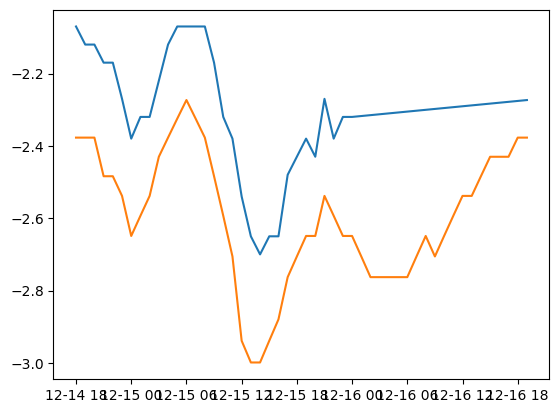

In [580]:
station = "15295700"
ratingData = nwis.get_ratings(site=station, file_type="exsa")
discharge = nwis.get_iv(sites=station, parameterCd="00065", start=start, end=end)[0].tz_convert(None)
dischargeh = discharge["00065"].groupby(pd.Grouper(freq='1H')).mean("numeric_only")
est = -ratingData[0].set_index("INDEP")["DEP"].loc[dischargeh.round(2)]*.3048**3

plt.plot(index[:-30], ds["river_transport"][:,0][:-30])
plt.plot(index[:-30], est.iloc[:-30])

In [547]:
station = "15239070"
i=1
ratingData = nwis.get_ratings(site=station, file_type="exsa")
discharge = nwis.get_iv(sites=station, parameterCd="00065", start=start, end=end)[0].tz_convert(None)
dischargeh = discharge["00065"].groupby(pd.Grouper(freq='1H')).mean("numeric_only")
est = -ratingData[0].set_index("INDEP")["DEP"].loc[dischargeh.round(2)]*.3**3

plt.plot(index[:-30], ds["river_transport"][:,i][:-30])
plt.plot(index[:-30], est.iloc[:-30])

KeyError: "None of ['INDEP'] are in the columns"

In [544]:
station_list_file[1]

'15239070'

In [555]:
station = "15290000"
ratingData = nwis.get_ratings(site=station, file_type="exsa")
ratingData[0]

INDEP  SHIFT      DEP STOR
0     0.78   0.18     6.99  NaN
1     0.79   0.18     7.13  NaN
2     0.80   0.18     7.28  NaN
3     0.81   0.18     7.42  NaN
4     0.82   0.18     7.57  NaN
..     ...    ...      ...  ...
910   9.88   0.00  7792.22  NaN
911   9.89   0.00  7807.42  NaN
912   9.90   0.00  7822.62  NaN
913   9.91   0.00  7838.80  NaN
914   9.92   0.00  7855.00    *

[915 rows x 4 columns]

In [ ]:
# See if I can match the operational rivers file example we have

## Read in existing rivers file to use
loc = 'nos.ciofs.river.20221216.t00z (1).nc'
# loc = "nos.ciofs.river.20230201.t00z.nc"
ds = xr.open_dataset(loc)

start = f"{ds['river_time'][0].values}Z"
end = f"{ds['river_time'][-1].values}Z"

# start = '2022-12-14T18:00Z'
# end = '2022-12-18T01:00Z'

# copy to put new results in for comparison
dsnew = ds.copy(deep=True)
ds

<xarray.Dataset>
Dimensions:          (river: 36, s_rho: 30, time: 80)
Coordinates:
  * river            (river) int32 1 2 3 4 5 6 7 8 9 ... 29 30 31 32 33 34 35 36
Dimensions without coordinates: s_rho, time
Data variables:
    river_names      (river) |S46 ...
    river_Xposition  (river) int32 ...
    river_Eposition  (river) int32 ...
    river_direction  (river) int32 ...
    river_flag       (river) int32 ...
    river_sign       (river) float32 ...
    river_Vshape     (s_rho, river) float32 ...
    river_time       (time) datetime64[ns] ...
    river_transport  (time, river) float32 ...
    river_temp       (time, s_rho, river) float32 ...
    river_salt       (time, s_rho, river) float32 ...
    river_pass       (time, s_rho, river) float32 ...
Attributes:
    type:             ROMS river forcing netCDF file
    title:            ciofs River forcing netCDF file
    data_source:      River discharge from USGS real time or daily mean
    Temp_source:      River T from USGS real time or daily mean, Salt=0
    model_grid_file:  GRID file: nos.ciofs.romsgrid.nc
    output_file:      River Forcing file: nos.ciofs.river.20221216.t00z.nc
    source_code:      Created using nos_ofs_create_river_ROMS.sh
    history:          Created at time 00:52  12/16/2022
    reference:        Created by Aijun Zhang, OD/CO-OPS/NOS/NOAA

In [ ]:
station_list_file = [str(int(val)) for val in ds["river_names"].values]
stations = list(set(station_list_file))
stations

['15276000',
 '15290000',
 '15271000',
 '15239900',
 '15281000',
 '15295700',
 '15239070',
 '15275100',
 '15266300',
 '15284000',
 '15292780',
 '15274600']

# See if I can match the operational rivers file example we have

## Read in existing rivers file to use

In [445]:
loc = 'nos.ciofs.river.20221216.t00z (1).nc'
ds = xr.open_dataset(loc)

# copy to put new results in for comparison
dsnew = ds.copy(deep=True)
ds

<xarray.Dataset>
Dimensions:          (river: 36, s_rho: 30, time: 80)
Coordinates:
  * river            (river) int32 1 2 3 4 5 6 7 8 9 ... 29 30 31 32 33 34 35 36
Dimensions without coordinates: s_rho, time
Data variables:
    river_names      (river) |S46 ...
    river_Xposition  (river) int32 ...
    river_Eposition  (river) int32 ...
    river_direction  (river) int32 ...
    river_flag       (river) int32 ...
    river_sign       (river) float32 ...
    river_Vshape     (s_rho, river) float32 ...
    river_time       (time) datetime64[ns] ...
    river_transport  (time, river) float32 ...
    river_temp       (time, s_rho, river) float32 ...
    river_salt       (time, s_rho, river) float32 ...
    river_pass       (time, s_rho, river) float32 ...
Attributes:
    type:             ROMS river forcing netCDF file
    title:            ciofs River forcing netCDF file
    data_source:      River discharge from USGS real time or daily mean
    Temp_source:      River T from USGS real time or daily mean, Salt=0
    model_grid_file:  GRID file: nos.ciofs.romsgrid.nc
    output_file:      River Forcing file: nos.ciofs.river.20221216.t00z.nc
    source_code:      Created using nos_ofs_create_river_ROMS.sh
    history:          Created at time 00:52  12/16/2022
    reference:        Created by Aijun Zhang, OD/CO-OPS/NOS/NOAA

In [543]:
ds["river_transport"].values[:,1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [446]:
station_list_file = [str(int(val)) for val in ds["river_names"].values]
stations = list(set(station_list_file))
stations

['15276000',
 '15290000',
 '15271000',
 '15239900',
 '15281000',
 '15295700',
 '15239070',
 '15275100',
 '15266300',
 '15284000',
 '15292780',
 '15274600']

## Get river data from USGS

average to hourly

have to catch ice values

CIOFS dev report https://tidesandcurrents.noaa.gov/ofs/publications/CS_Techrpt_040_SA_CIOFS_2020.pdf has two important notes:
* all water temperatures are used from Bradley river (15239070). This data is available back a decade. Before that, I will use the mean or median temperature values which I can also get from USGS.
* the Susitna River gauge at Sunshine shut down in 2021. The language used in the report about this point is pretty confusing but I think the modeling group decided to use the same discharge rate for both Susitna river inputs (on-going station 15290000 and discontinued station 15292780), making it so that the combined total from the two rivers is twice one (which I think the report is trying to say).
* They seem to bump temp values below 1 up to 1.
* Also need to change ice values to 0 for discharge
* Also need to add 0s in if data missing but instrument exists

In [472]:
discharge = nwis.get_iv(sites="15275100", parameterCd="00065", start=start, end=end)
discharge

(                           00065 00065_cd   site_no
 datetime                                           
 2022-12-13 09:00:00-09:00   2.51        P  15275100
 2022-12-13 09:15:00-09:00   2.45        P  15275100
 2022-12-13 09:30:00-09:00   2.41        P  15275100
 2022-12-13 09:45:00-09:00   2.40        P  15275100
 2022-12-13 10:00:00-09:00   2.40        P  15275100
 ...                          ...      ...       ...
 2022-12-18 15:00:00-09:00   4.12        P  15275100
 2022-12-18 15:15:00-09:00   4.13        P  15275100
 2022-12-18 15:30:00-09:00   4.13        P  15275100
 2022-12-18 15:45:00-09:00   4.15        P  15275100
 2022-12-18 16:00:00-09:00   4.15        P  15275100
 
 [509 rows x 3 columns],
 <dataretrieval.utils.Metadata at 0x7fe3b3d45eb0>)

<AxesSubplot:xlabel='datetime'>

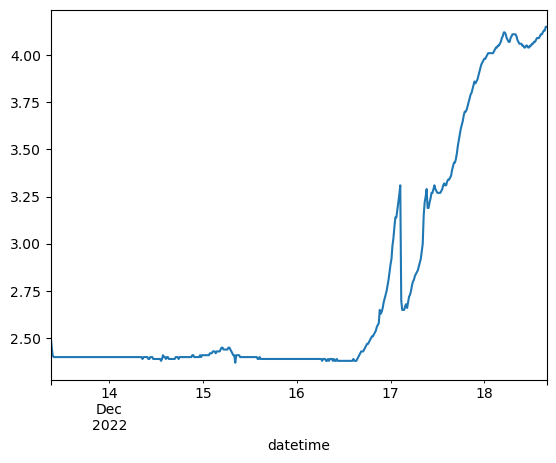

In [474]:
discharge[0]["00065"].plot()

In [468]:
ratingData = nwis.get_ratings(site="15275100", file_type="exsa")
ratingData[0]

INDEP  SHIFT     DEP STOR
0     1.75   0.11    1.90  NaN
1     1.76   0.11    2.06  NaN
2     1.77   0.11    2.23  NaN
3     1.78   0.11    2.41  NaN
4     1.79   0.11    2.60  NaN
..     ...    ...     ...  ...
412   5.87   0.00  454.67  NaN
413   5.88   0.00  456.25  NaN
414   5.89   0.00  457.83  NaN
415   5.90   0.00  459.42  NaN
416   5.91   0.00  461.00    *

[417 rows x 4 columns]

Text(0, 0.5, 'streamflow cubic feet per sec')

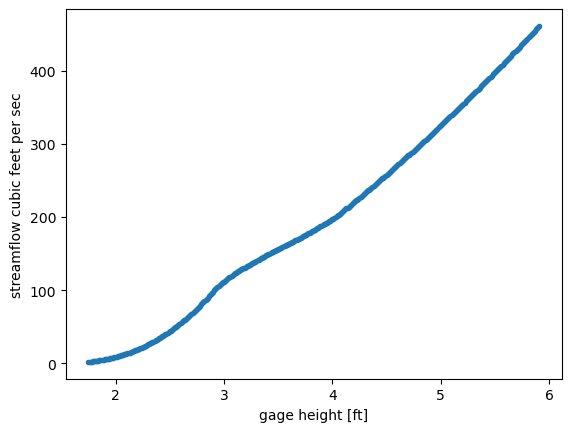

In [470]:
plt.plot(ratingData[0]["INDEP"], ratingData[0]["DEP"], ".")
plt.xlabel("gage height [ft]")
plt.ylabel("streamflow cubic feet per sec")

In [487]:
discharge[0]["00065"]

datetime
2022-12-13 09:00:00-09:00    2.51
2022-12-13 09:15:00-09:00    2.45
2022-12-13 09:30:00-09:00    2.41
2022-12-13 09:45:00-09:00    2.40
2022-12-13 10:00:00-09:00    2.40
                             ... 
2022-12-18 15:00:00-09:00    4.12
2022-12-18 15:15:00-09:00    4.13
2022-12-18 15:30:00-09:00    4.13
2022-12-18 15:45:00-09:00    4.15
2022-12-18 16:00:00-09:00    4.15
Name: 00065, Length: 509, dtype: float64

In [494]:
ratingData[0].set_index("INDEP")["DEP"].loc[discharge[0]["00065"]]

INDEP
2.51     44.74
2.45     38.67
2.41     34.91
2.40     34.01
2.40     34.01
         ...  
4.12    210.42
4.13    211.62
4.13    211.62
4.15    214.03
4.15    214.03
Name: DEP, Length: 509, dtype: float64

In [484]:
# interpolate
# reindex DEP to 
ratingData[0]["INDEP"]#[discharge["00065"]]

0      1.75
1      1.76
2      1.77
3      1.78
4      1.79
       ... 
412    5.87
413    5.88
414    5.89
415    5.90
416    5.91
Name: INDEP, Length: 417, dtype: float64

In [483]:
discharge[0]["00065"]

datetime
2022-12-13 09:00:00-09:00    2.51
2022-12-13 09:15:00-09:00    2.45
2022-12-13 09:30:00-09:00    2.41
2022-12-13 09:45:00-09:00    2.40
2022-12-13 10:00:00-09:00    2.40
                             ... 
2022-12-18 15:00:00-09:00    4.12
2022-12-18 15:15:00-09:00    4.13
2022-12-18 15:30:00-09:00    4.13
2022-12-18 15:45:00-09:00    4.15
2022-12-18 16:00:00-09:00    4.15
Name: 00065, Length: 509, dtype: float64

In [457]:
ratingData[1]

In [450]:
df

00020 00020_cd   site_no  00060 00060_cd  00065  \
datetime                                                                     
2022-12-13 09:00:00-09:00   -8.1        P  15275100    NaN      NaN   2.51   
2022-12-13 09:15:00-09:00    NaN      NaN  15275100    NaN      NaN   2.45   
2022-12-13 09:30:00-09:00    NaN      NaN  15275100    NaN      NaN   2.41   
2022-12-13 09:45:00-09:00    NaN      NaN  15275100    NaN      NaN   2.40   
2022-12-13 10:00:00-09:00   -7.4        P  15275100   34.0        P   2.40   
...                          ...      ...       ...    ...      ...    ...   
2022-12-18 15:00:00-09:00  -16.0        P  15275100    NaN      NaN   4.12   
2022-12-18 15:15:00-09:00    NaN      NaN  15275100    NaN      NaN   4.13   
2022-12-18 15:30:00-09:00    NaN      NaN  15275100    NaN      NaN   4.13   
2022-12-18 15:45:00-09:00    NaN      NaN  15275100    NaN      NaN   4.15   
2022-12-18 16:00:00-09:00  -17.4        P  15275100    NaN      NaN   4.15   

                          00065_cd  
datetime                            
2022-12-13 09:00:00-09:00        P  
2022-12-13 09:15:00-09:00        P  
2022-12-13 09:30:00-09:00        P  
2022-12-13 09:45:00-09:00        P  
2022-12-13 10:00:00-09:00        P  
...                            ...  
2022-12-18 15:00:00-09:00        P  
2022-12-18 15:15:00-09:00        P  
2022-12-18 15:30:00-09:00        P  
2022-12-18 15:45:00-09:00        P  
2022-12-18 16:00:00-09:00        P  

[509 rows x 7 columns]

<AxesSubplot:xlabel='datetime'>

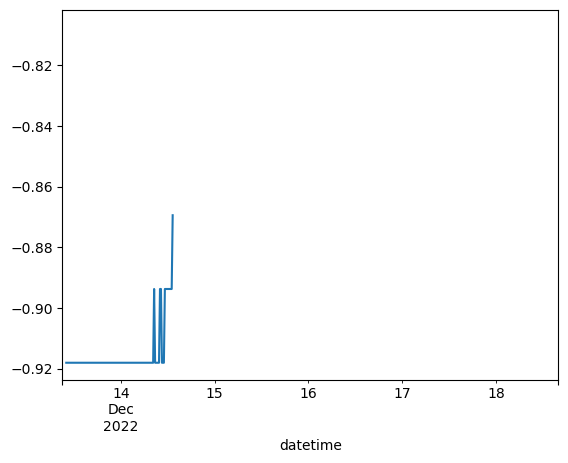

In [449]:
df = nwis.get_record(sites="15275100", service='iv', start=start, end=end)
(-df["00060"]*0.3**3).plot()

In [426]:
measurements1 = nwis.get_discharge_measurements(sites="15275100")#, start=start, end=end)
measurements1

(    agency_cd   site_no measurement_nu       measurement_dt tz_cd  \
 0        USGS  15275100              1  1966-06-21 23:00:00  AKST   
 1        USGS  15275100              2  1966-08-26 23:00:00  AKST   
 2        USGS  15275100              3  1966-10-05 23:00:00  AKST   
 3        USGS  15275100              4  1966-11-13 23:00:00  AKST   
 4        USGS  15275100              5  1967-01-02 23:00:00  AKST   
 ..        ...       ...            ...                  ...   ...   
 606      USGS  15275100            606  2022-07-22 12:42:30  AKDT   
 607      USGS  15275100            607  2022-07-28 09:45:42  AKDT   
 608      USGS  15275100            608  2022-09-26 11:05:00  AKDT   
 609      USGS  15275100            609  2022-11-18 16:21:28  AKST   
 610      USGS  15275100            610  2023-01-30 13:04:14  AKST   
 
     q_meas_used_fg party_nm site_visit_coll_agency_cd  gage_height_va  \
 0              Yes  LSD/JDM                      USGS            1.79   
 1        

In [429]:
measurements1[0]

agency_cd   site_no measurement_nu       measurement_dt tz_cd  \
0        USGS  15275100              1  1966-06-21 23:00:00  AKST   
1        USGS  15275100              2  1966-08-26 23:00:00  AKST   
2        USGS  15275100              3  1966-10-05 23:00:00  AKST   
3        USGS  15275100              4  1966-11-13 23:00:00  AKST   
4        USGS  15275100              5  1967-01-02 23:00:00  AKST   
..        ...       ...            ...                  ...   ...   
606      USGS  15275100            606  2022-07-22 12:42:30  AKDT   
607      USGS  15275100            607  2022-07-28 09:45:42  AKDT   
608      USGS  15275100            608  2022-09-26 11:05:00  AKDT   
609      USGS  15275100            609  2022-11-18 16:21:28  AKST   
610      USGS  15275100            610  2023-01-30 13:04:14  AKST   

    q_meas_used_fg party_nm site_visit_coll_agency_cd  gage_height_va  \
0              Yes  LSD/JDM                      USGS            1.79   
1              Yes  D S/RLG                      USGS            1.64   
2              Yes       LS                      USGS            1.72   
3              Yes  RLG/LSD                      USGS             NaN   
4              Yes  RLG/LSD                      USGS             NaN   
..             ...      ...                       ...             ...   
606            Yes  BAD/SAK                      USGS            3.02   
607            Yes  SAK/KJW                      USGS            2.51   
608            Yes   SAKCVB                      USGS            2.70   
609            Yes  SAK/AJM                      USGS            2.47   
610            Yes  BAD/MER                      USGS            2.30   

     discharge_va measured_rating_diff  gage_va_change  gage_va_time  \
0            32.4                 Good            0.00          0.50   
1            25.2                 Good            0.00          0.30   
2            29.6                 Good            0.01          0.40   
3            14.5                 Poor             NaN           NaN   
4            11.4                 Fair             NaN           NaN   
..            ...                  ...             ...           ...   
606          98.0                 Fair            0.03          0.25   
607          34.5                 Good            0.02          0.50   
608          56.8                 Good            0.00          0.75   
609          41.0                 Fair            0.00          0.75   
610          25.8                 Good            0.00          1.00   

    control_type_cd discharge_cd  
0       DebrisLight         NONE  
1             Clear         NONE  
2               NaN         NONE  
3               NaN         NONE  
4               NaN         NONE  
..              ...          ...  
606     DebrisLight         NONE  
607     DebrisLight         NONE  
608     DebrisLight         NONE  
609     DebrisLight         NONE  
610           Clear         NONE  

[611 rows x 15 columns]

In [411]:
df = nwis.get_record(sites=stations, service='iv', start=start, end=end)
# convert to UTC
df.index.set_levels([df.index.levels[0], df.index.levels[1].tz_convert("UTC")], inplace=True)
# df.index.set_levels([df.index.levels[0], df.index.levels[1].tz_convert("America/Anchorage")], inplace=True)
df["00060"] = df["00060"]* 0.3**3  # convert cubic feet to cubic meter

# process discharge data some
# if discharge is -26999.973 or nan, set to 0
df.loc[df["00060"] + 26999.973 < 1e-3, "00060"] = 0
df.loc[df["00060"].isnull(), "00060"] = 0

dfh = df[["00010", "00060"]].groupby(["site_no", pd.Grouper(freq='1H', level=-1)]).mean("numeric_only")

# limit to desired time range
# dfh = dfh.loc[("15239070", start_actual):("15295700",end_actual)]
dfh

/var/folders/mf/by34w_vj643fb7dvt5skt7p40000gn/T/ipykernel_54677/3849178722.py:3: FutureWarning: inplace is deprecated and will be removed in a future version.
  df.index.set_levels([df.index.levels[0], df.index.levels[1].tz_convert("UTC")], inplace=True)


00010     00060
site_no  datetime                                  
15239070 2022-12-14 03:00:00+00:00  0.000  0.000000
         2022-12-14 04:00:00+00:00  0.000  0.000000
         2022-12-14 05:00:00+00:00  0.000  0.000000
         2022-12-14 06:00:00+00:00  0.000  0.000000
         2022-12-14 07:00:00+00:00  0.000  0.000000
...                                   ...       ...
15295700 2022-12-19 06:00:00+00:00  0.850  2.000025
         2022-12-19 07:00:00+00:00  0.900  1.907550
         2022-12-19 08:00:00+00:00  1.000  1.776600
         2022-12-19 09:00:00+00:00  1.075  1.744200
         2022-12-19 10:00:00+00:00  1.100  1.711800

[1280 rows x 2 columns]

/var/folders/mf/by34w_vj643fb7dvt5skt7p40000gn/T/ipykernel_54677/2447047859.py:7: FutureWarning: inplace is deprecated and will be removed in a future version.
  df.index.set_levels([df.index.levels[0], df.index.levels[1].tz_convert("UTC")], inplace=True)


<AxesSubplot:xlabel='datetime'>

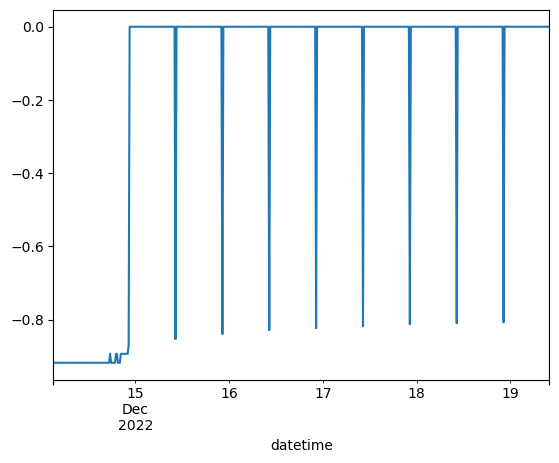

In [442]:
df = nwis.get_record(sites=stations, service='iv', start=start, end=end)

# All stations, only discharge, with Z, then convert
discharge_multisite = nwis.get_iv(sites=['04024430', '04024000'], parameterCd=parameterCode,
                                  start='2013-10-01', end='2013-10-01')

df.index.set_levels([df.index.levels[0], df.index.levels[1].tz_convert("UTC")], inplace=True)
df["00060"] = df["00060"]* 0.3**3 
df.loc[df["00060"] + 26999.973 < 1e-3, "00060"] = 0
df.loc[df["00060"].isnull(), "00060"] = 0
(-df.loc["15275100"][:]["00060"]).plot()

Make arrays for data for river forcing file

INCORPORATE NARROWER TIME WINDOW

In [374]:
ntimes = len(pd.date_range(start_actual, end_actual, freq="1H"))
nsrho = 30
nrivers = len(station_list_file)

river_transport = np.zeros((ntimes, nrivers))


Fill arrays

In [957]:
discharge_multisite = nwis.get_iv(sites="15239070", parameterCd="00010",
                                  start=start + "Z", end=end+"Z")

ValueError: Bad Request, check that your parameters are correct. URL: https://waterservices.usgs.gov/nwis/iv?format=json&startDT=2023-01-30T18%3A00%3A00.000000000ZZ&endDT=2023-02-03T01%3A00%3A07.031249984ZZ&sites=15239070&parameterCd=00010

In [437]:
discharge_multisite[0]

00010 00010_cd   site_no
datetime                                           
2022-12-13 09:00:00-09:00    0.0        P  15239070
2022-12-13 09:15:00-09:00    0.0        P  15239070
2022-12-13 09:30:00-09:00    0.0        P  15239070
2022-12-13 09:45:00-09:00    0.0        P  15239070
2022-12-13 10:00:00-09:00    0.0        P  15239070
...                          ...      ...       ...
2022-12-18 15:00:00-09:00    0.0        P  15239070
2022-12-18 15:15:00-09:00    0.0        P  15239070
2022-12-18 15:30:00-09:00    0.0        P  15239070
2022-12-18 15:45:00-09:00    0.0        P  15239070
2022-12-18 16:00:00-09:00    0.0        P  15239070

[509 rows x 3 columns]

In [375]:
# Just broadcast temps from one river out. But also if temp<1, set to 1.

bradley_temp = "15239070"
river_temp = dfh.loc[bradley_temp][start_actual:end_actual]["00010"].values[:,np.newaxis].repeat(nsrho, axis=1)[:,:,np.newaxis].repeat(nrivers, axis=2)
river_temp[river_temp<1] = 1

In [376]:
for i, station_file in enumerate(station_list_file):
    # CHANGE THIS
    if station_file == "15292780":  # fill with 15290000
        river_transport[:,i] = dfh.loc["15290000"][start_actual:end_actual]["00060"]# dfh.loc["15290000",:]["00060"]
    elif station_file not in dfh.index.levels[0]:
        river_transport[:,i] = 0
    else:
        river_transport[:,i] = dfh.loc[station_file][start_actual:end_actual]["00060"]# dfh.loc[station_file,:]["00060"]
    
    # # divide by the number of cells river is represented by
    # river_transport[:,i] /= station_list_file.count(station_file)
    
dsnew["river_transport"][:] = -river_transport

Compare their and my datasets.

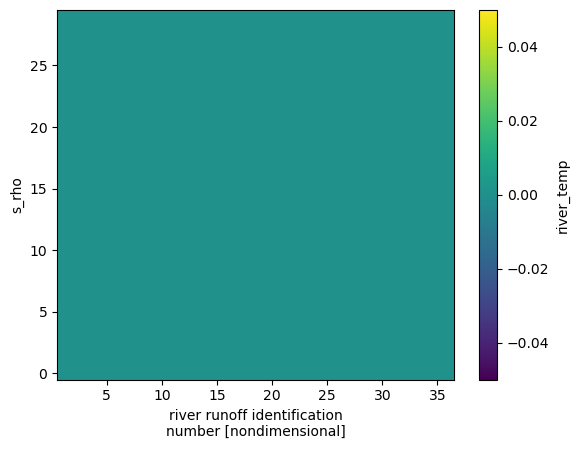

In [377]:
(ds["river_temp"] - dsnew["river_temp"]).isel(time=-1).plot()

There are only 2 non-zero rivers:

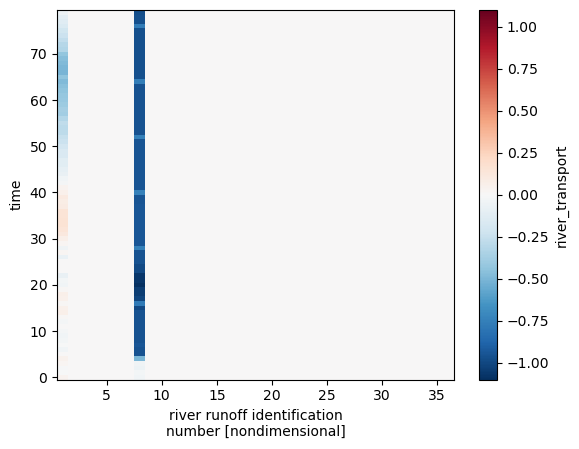

In [378]:
(ds["river_transport"] - dsnew["river_transport"]).plot()

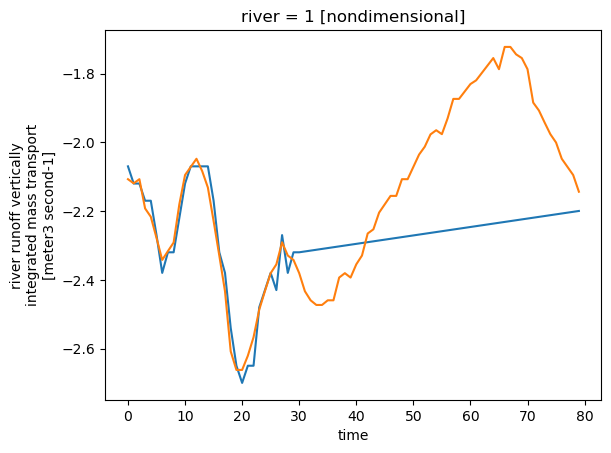

In [379]:
i=0
ds["river_transport"][:,i].plot()
dsnew["river_transport"][:,i].plot()

In [390]:
ds["river_time"][20].values

numpy.datetime64('2022-12-15T13:59:52.968750016')

In [406]:
station_list_file[7]

'15275100'

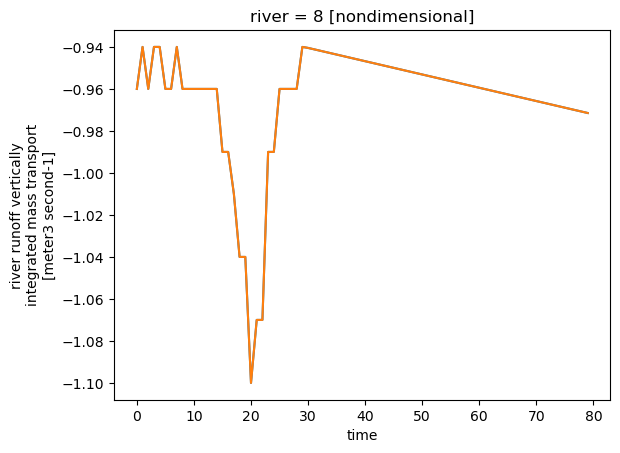

In [447]:
i=7
# ds["river_time"].plot()
ds["river_transport"][:,i].plot()
dsnew["river_transport"][:,i].plot()

In [372]:
ds["river_transport"][:,i].values

array([-0.96      , -0.94      , -0.96      , -0.94      , -0.94      ,
       -0.96      , -0.96      , -0.94      , -0.96      , -0.96      ,
       -0.96      , -0.96      , -0.96      , -0.96      , -0.96      ,
       -0.99      , -0.99      , -1.01      , -1.04      , -1.04      ,
       -1.1       , -1.07      , -1.07      , -0.99      , -0.99      ,
       -0.96      , -0.96      , -0.96      , -0.96      , -0.94      ,
       -0.94047445, -0.9411083 , -0.9417384 , -0.94237226, -0.94300616,
       -0.9436363 , -0.94427013, -0.94490397, -0.9455341 , -0.94616795,
       -0.9468018 , -0.9474319 , -0.9480658 , -0.94869965, -0.9493298 ,
       -0.9499636 , -0.95059747, -0.9512276 , -0.95186144, -0.9524953 ,
       -0.9531254 , -0.9537593 , -0.95439315, -0.9550233 , -0.9556571 ,
       -0.95629096, -0.9569211 , -0.95755494, -0.9581888 , -0.9588189 ,
       -0.9594528 , -0.96008664, -0.9607168 , -0.9613506 , -0.96198446,
       -0.9626146 , -0.96324843, -0.9638823 , -0.96451247, -0.96

In [373]:
dsnew["river_transport"][:,i].values

array([-0.918   , -0.90585 , -0.899775, -0.8937  , -0.440775, -0.      ,
       -0.      , -0.      , -0.      , -0.      , -0.      , -0.      ,
       -0.      , -0.      , -0.      , -0.      , -0.2133  , -0.      ,
       -0.      , -0.      , -0.      , -0.      , -0.      , -0.      ,
       -0.      , -0.      , -0.      , -0.      , -0.209925, -0.      ,
       -0.      , -0.      , -0.      , -0.      , -0.      , -0.      ,
       -0.      , -0.      , -0.      , -0.      , -0.207225, -0.      ,
       -0.      , -0.      , -0.      , -0.      , -0.      , -0.      ,
       -0.      , -0.      , -0.      , -0.      , -0.205875, -0.      ,
       -0.      , -0.      , -0.      , -0.      , -0.      , -0.      ,
       -0.      , -0.      , -0.      , -0.      , -0.204525, -0.      ,
       -0.      , -0.      , -0.      , -0.      , -0.      , -0.      ,
       -0.      , -0.      , -0.      , -0.      , -0.203175, -0.      ,
       -0.      , -0.      ], dtype=float32)

# How to fill in missing station data

* 15276000

In [328]:
stations

['15276000',
 '15290000',
 '15271000',
 '15239900',
 '15281000',
 '15295700',
 '15239070',
 '15275100',
 '15266300',
 '15284000',
 '15292780',
 '15274600']

In [329]:
station_list_file

['15295700',
 '15239070',
 '15239900',
 '15266300',
 '15266300',
 '15271000',
 '15274600',
 '15275100',
 '15276000',
 '15281000',
 '15281000',
 '15281000',
 '15281000',
 '15281000',
 '15281000',
 '15281000',
 '15281000',
 '15281000',
 '15281000',
 '15284000',
 '15284000',
 '15284000',
 '15284000',
 '15284000',
 '15284000',
 '15284000',
 '15284000',
 '15284000',
 '15284000',
 '15290000',
 '15290000',
 '15292780',
 '15292780',
 '15292780',
 '15292780',
 '15292780']

discharge 00060 equals -26999.973 in dfh if ice or nan
USGS dashboard shows geographic relationship between stations: https://dashboard.waterdata.usgs.gov/app/nwd/en/?region=lower48&aoi=default

15266300 has water temps, transport is ice. discharge covers all years, temp started in 2014 (NEED REPLACEMENT)

15239070 has water temps and transport. discharge covers all years, temp started in 2010. (NEED REPLACEMENT)

15276000 has temp, transport is ice. discharge covers all years, temp started in 2014

15290000 has temp, transport is ice. discharge covers all years, temp started in 2014

15281000 data missing. Discharge started in 2001 (NEED REPLACEMENT), no temp
possible replacements
15284000 discharge available full time, temp started in 2015
15283700 discharge started in 1999, temp started in 2013
-check correlation of discharge between station and replacement station, use annual mean temp

15271000 temps are nan (use temp from 15258000) and transport is ice. discharge covers all years, temp never available.
replacement station 15258000, temp available starting in 2007

15274600 temps are missing (WHAT TO USE TO REPLACE?) and transport is ice. discharge covers all years, temp is never available.

15292780 is completely missing — stopped in 2021. Discharge available 2011-2021, temp available 2012 to 2015 so need a replacement outside those years

## 15266300

Use annual mean for temp for missing data

<AxesSubplot:xlabel='datetime'>

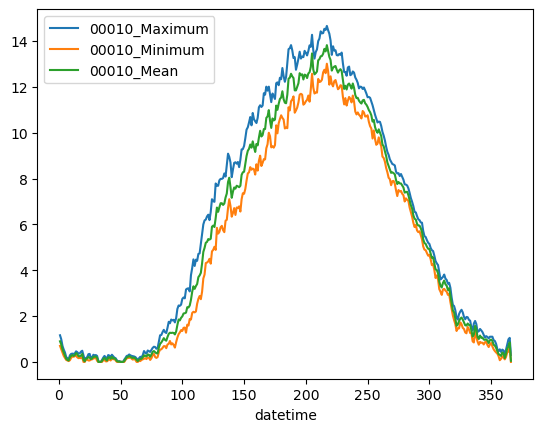

In [135]:
# study to decide how to handle missing data
station = "15266300"
start = "2015-1-1"
end = "2022-12-31"
df = nwis.get_record(sites=station, service='dv', start=start, end=end)
df.groupby(df.index.day_of_year).mean("numeric_only")[["00010_Maximum", "00010_Minimum", "00010_Mean"]].plot()

## 15239070


<AxesSubplot:>

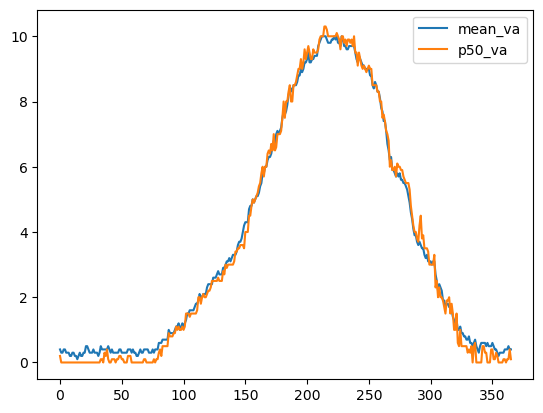

In [207]:
# Set the parameters needed to retrieve data
siteNumber = "15239070"
parameterCode = "00010" # "00060" # Discharge

# Retrieve the statistics
x1 = nwis.get_stats(sites=siteNumber, parameterCd=parameterCode, statReportType="daily")
x1[0][["mean_va", "p50_va"]].plot()

# USE MEAN

<AxesSubplot:xlabel='datetime'>

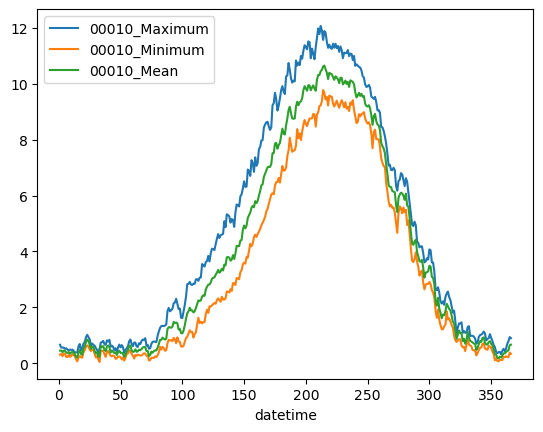

In [136]:
# study to decide how to handle missing data
station = "15239070"
start = "2011-1-1"
end = "2022-12-31"
df = nwis.get_record(sites=station, service='dv', start=start, end=end)
df.groupby(df.index.day_of_year).mean("numeric_only")[["00010_Maximum", "00010_Minimum", "00010_Mean"]].plot()

## 15276000


<AxesSubplot:xlabel='datetime'>

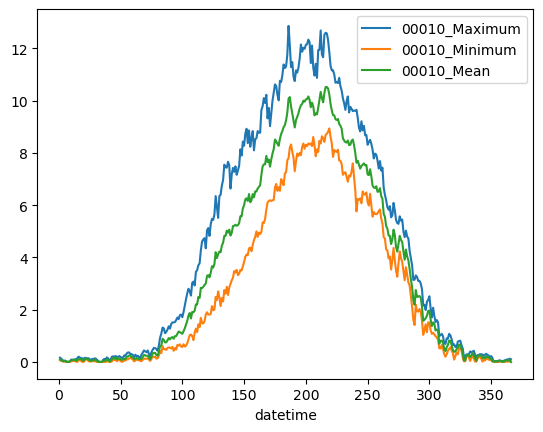

In [137]:
# study to decide how to handle missing data
station = "15276000"
start = "2015-1-1"
end = "2022-12-31"
df = nwis.get_record(sites=station, service='dv', start=start, end=end)
df.groupby(df.index.day_of_year).mean("numeric_only")[["00010_Maximum", "00010_Minimum", "00010_Mean"]].plot()

## 15290000


<AxesSubplot:xlabel='datetime'>

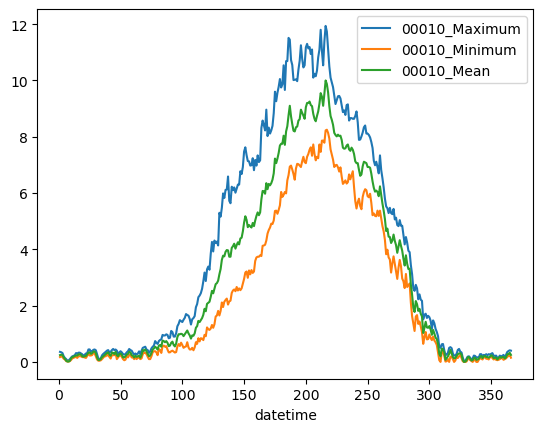

In [138]:
# study to decide how to handle missing data
station = "15290000"
start = "2015-1-1"
end = "2022-12-31"
df = nwis.get_record(sites=station, service='dv', start=start, end=end)
df.groupby(df.index.day_of_year).mean("numeric_only")[["00010_Maximum", "00010_Minimum", "00010_Mean"]].plot()

## 15281000

15281000 data missing. Discharge started in 2001 (NEED REPLACEMENT), no temp
possible replacements
15284000 discharge available full time, temp started in 2015
15283700 discharge started in 1999, temp started in 2013
-check correlation of discharge between station and replacement station, use annual mean temp


<AxesSubplot:xlabel='datetime'>

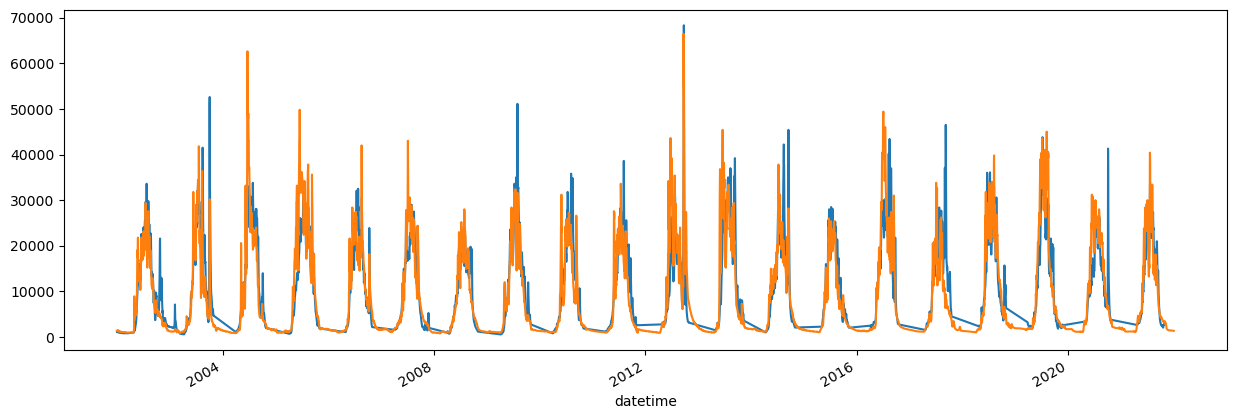

In [153]:
# study to decide how to handle missing data
station = "15281000"
start = "2002-1-1"
end = "2022-12-31"
df1 = nwis.get_record(sites=station, service='dv', start=start, end=end)
station = "15284000"
df2 = nwis.get_record(sites=station, service='dv', start=start, end=end)
ax = df1["00060_Mean"].loc[:"2021"].plot(figsize=(15,5))
(df2["00060_Mean"]*2).loc[:"2021"].plot(ax=ax)
# df.groupby(df.index.day_of_year).mean("numeric_only")[["00010_Maximum", "00010_Minimum", "00010_Mean"]].plot()

<AxesSubplot:xlabel='datetime'>

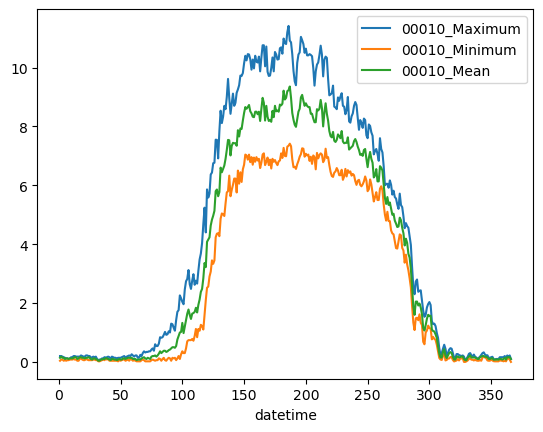

In [154]:
df2.loc["2016":].groupby(df2.loc["2016":].index.day_of_year).mean("numeric_only")[["00010_Maximum", "00010_Minimum", "00010_Mean"]].plot()

## 15271000

15271000 temps are nan (use temp from 15258000) and transport is ice. discharge covers all years, temp never available.
replacement station 15258000, temp available starting in 2007

<AxesSubplot:xlabel='datetime'>

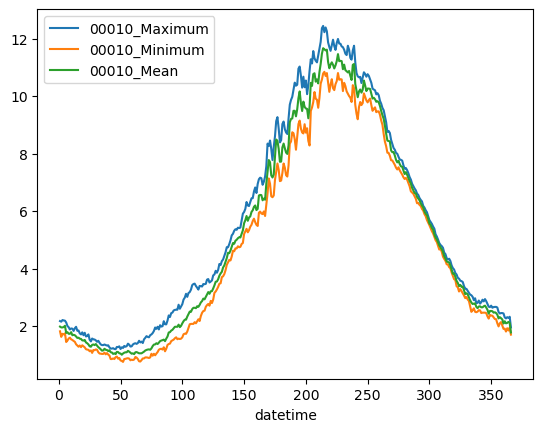

In [155]:
# replacement station
station = "15258000"
start = "2008-1-1"
end = "2022-12-31"
df = nwis.get_record(sites=station, service='dv', start=start, end=end)
df.groupby(df.index.day_of_year).mean("numeric_only")[["00010_Maximum", "00010_Minimum", "00010_Mean"]].plot()

## 15274600

15274600 temps are missing (WHAT TO USE TO REPLACE?) and transport is ice. discharge covers all years, temp is never available.
replacement station 15276000 has temp since 2014


<AxesSubplot:xlabel='datetime'>

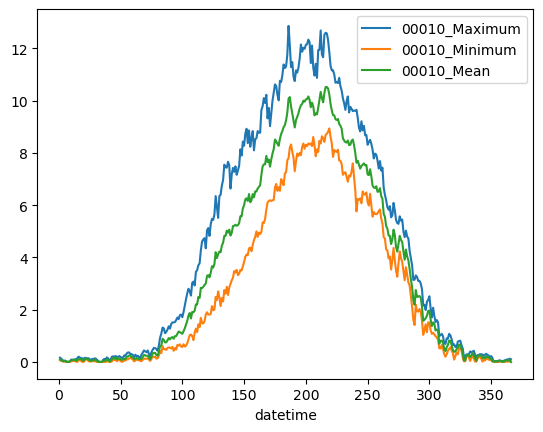

In [156]:
# replacement station
station = "15276000"
start = "2015-1-1"
end = "2022-12-31"
df = nwis.get_record(sites=station, service='dv', start=start, end=end)
df.groupby(df.index.day_of_year).mean("numeric_only")[["00010_Maximum", "00010_Minimum", "00010_Mean"]].plot()

## 15292780

15292780 is completely missing — stopped in 2021. Discharge available 2011-2021, temp available 2012 to 2015 so need a replacement outside those years

Another station is available with discharge for all years and temp since 2013: 15292700

Another station is available with discharge for all years and no temp: 15292000

<AxesSubplot:xlabel='datetime'>

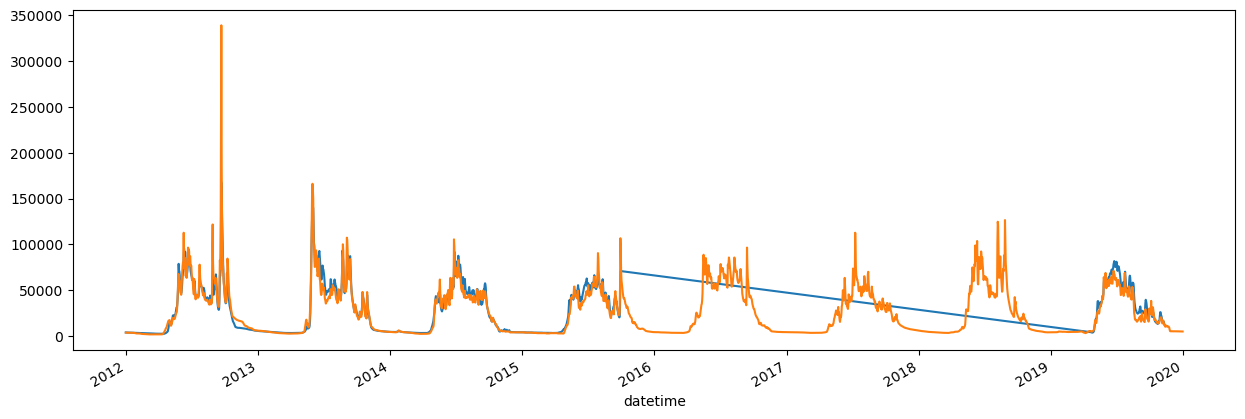

In [169]:
# study to decide how to handle missing data
station = "15292780"
start = "2012-1-1"
end = "2020-12-31"
df1 = nwis.get_record(sites=station, service='dv', start=start, end=end)
station = "15292700"
df2 = nwis.get_record(sites=station, service='dv', start=start, end=end)
ax = df1["00060_Mean"].loc[:"2019"].plot(figsize=(15,5))
(df2["00060_Mean"]*6).loc[:"2019"].plot(ax=ax)
# df.groupby(df.index.day_of_year).mean("numeric_only")[["00010_Maximum", "00010_Minimum", "00010_Mean"]].plot()

<AxesSubplot:xlabel='datetime'>

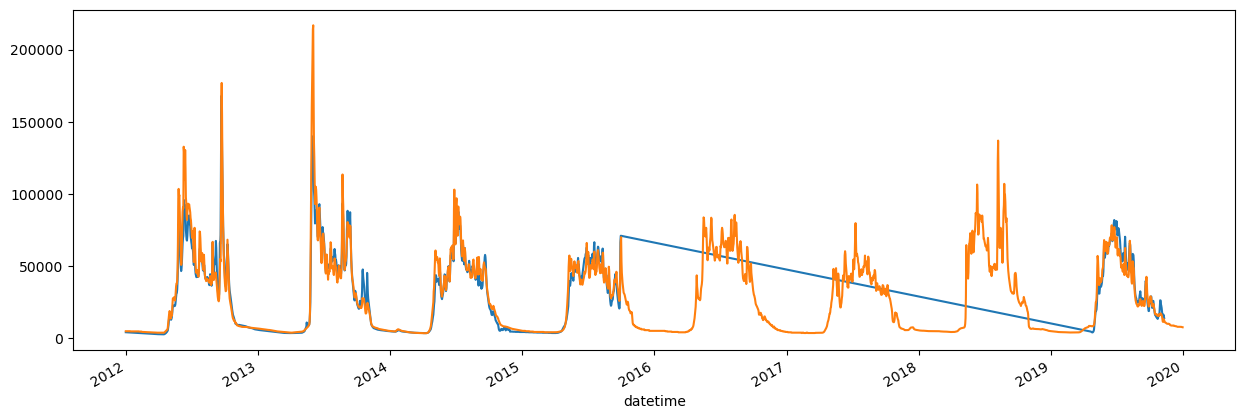

In [168]:
# study to decide how to handle missing data
station = "15292780"
start = "2012-1-1"
end = "2020-12-31"
df1 = nwis.get_record(sites=station, service='dv', start=start, end=end)
station = "15292000"
df2 = nwis.get_record(sites=station, service='dv', start=start, end=end)
ax = df1["00060_Mean"].loc[:"2019"].plot(figsize=(15,5))
(df2["00060_Mean"]*2.5).loc[:"2019"].plot(ax=ax)
# df.groupby(df.index.day_of_year).mean("numeric_only")[["00010_Maximum", "00010_Minimum", "00010_Mean"]].plot()

<AxesSubplot:xlabel='datetime'>

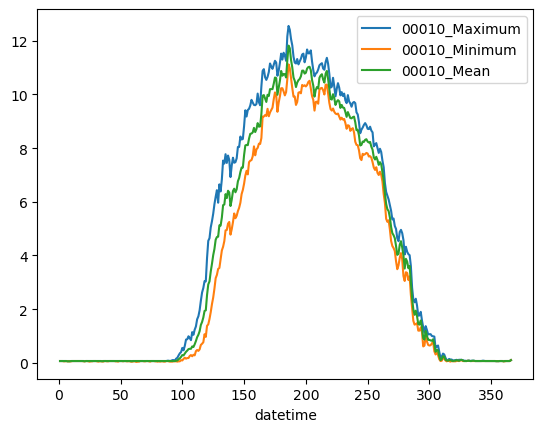

In [170]:
# replacement station
station = "15292700"
start = "2014-1-1"
end = "2022-12-31"
df = nwis.get_record(sites=station, service='dv', start=start, end=end)
df.groupby(df.index.day_of_year).mean("numeric_only")[["00010_Maximum", "00010_Minimum", "00010_Mean"]].plot()

# How often is gage data available but not discharge data

Due to ice or other instrument malfunction.

In [584]:
start = "1998-1-1"
end = "2020-1-1"

In [632]:
station = "15275100"
discharge3 = nwis.get_iv(sites=station, parameterCd=["00060","00065"], start=start, end=end)[0]
discharge3

00060 00060_cd   site_no  00065 00065_cd
datetime                                                               
1998-10-01T00:00:00.000-08:00   20.0  A, [91]  15275100    NaN      NaN
1998-10-01T00:15:00.000-08:00   12.0  A, [91]  15275100    NaN      NaN
1998-10-01T00:30:00.000-08:00   12.0  A, [91]  15275100    NaN      NaN
1998-10-01T00:45:00.000-08:00   12.0  A, [91]  15275100    NaN      NaN
1998-10-01T01:00:00.000-08:00   12.0  A, [91]  15275100    NaN      NaN
...                              ...      ...       ...    ...      ...
2020-01-01T22:45:00.000-09:00   28.7        A  15275100   2.49        A
2020-01-01T23:00:00.000-09:00   28.7        A  15275100   2.49        A
2020-01-01T23:15:00.000-09:00   28.2        A  15275100   2.48        A
2020-01-01T23:30:00.000-09:00   27.7        A  15275100   2.47        A
2020-01-01T23:45:00.000-09:00   26.7        A  15275100   2.45        A

[552627 rows x 5 columns]

In [ ]:
discharge2 = nwis.get_iv(sites=station, parameterCd=["00060","00065"], start=start, end=end)[0]

<AxesSubplot:xlabel='datetime'>

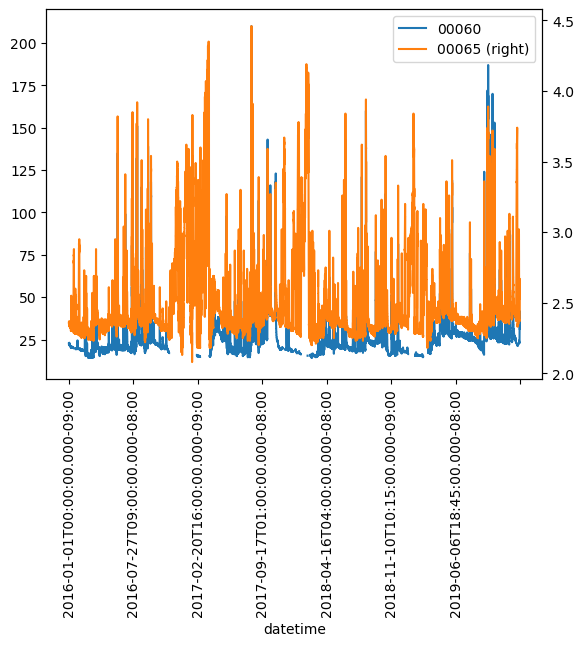

In [640]:
discharge3["2016":"2020"][["00060","00065"]].plot(secondary_y="00065", rot=90)

In [585]:
station = "15295700"
discharge = nwis.get_iv(sites=station, parameterCd="00060", start=start, end=end)[0]
gage = nwis.get_iv(sites=station, parameterCd="00065", start=start, end=end)[0]


In [598]:
gage["00065"], discharge.loc["1998":"2000","00060"]

(datetime
 2007-10-01T01:00:00.000-08:00    1.51
 2007-10-01T01:15:00.000-08:00    1.49
 2007-10-01T01:30:00.000-08:00    1.50
 2007-10-01T01:45:00.000-08:00    1.49
 2007-10-01T02:00:00.000-08:00    1.48
                                  ... 
 2020-01-01T22:45:00.000-09:00    1.42
 2020-01-01T23:00:00.000-09:00    1.43
 2020-01-01T23:15:00.000-09:00    1.43
 2020-01-01T23:30:00.000-09:00    1.42
 2020-01-01T23:45:00.000-09:00    1.42
 Name: 00065, Length: 387896, dtype: float64,
 datetime
 1998-01-01T00:00:00.000-09:00     64.0
 1998-01-01T00:15:00.000-09:00     64.0
 1998-01-01T00:30:00.000-09:00     64.0
 1998-01-01T00:45:00.000-09:00     64.0
 1998-01-01T01:00:00.000-09:00     67.0
                                  ...  
 1999-12-31T22:45:00.000-09:00    126.0
 1999-12-31T23:00:00.000-09:00    124.0
 1999-12-31T23:15:00.000-09:00    124.0
 1999-12-31T23:30:00.000-09:00    124.0
 1999-12-31T23:45:00.000-09:00    126.0
 Name: 00060, Length: 69976, dtype: float64)

<AxesSubplot:xlabel='datetime'>

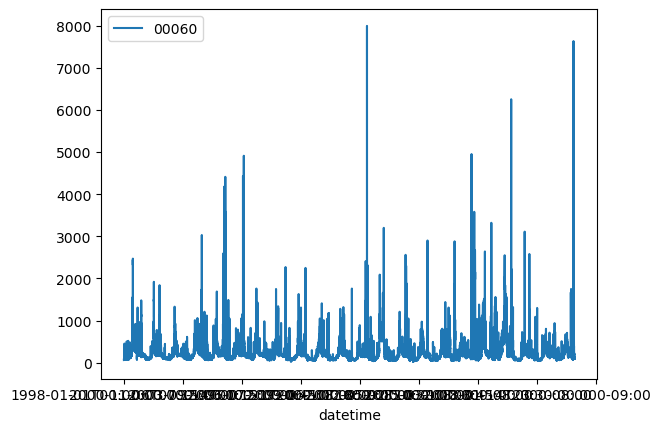

In [610]:
discharge.plot()



# ax.set_xlim(pd.Timestamp("1998-1-1"),pd.Timestamp("2020-1-1"))

<AxesSubplot:xlabel='datetime'>

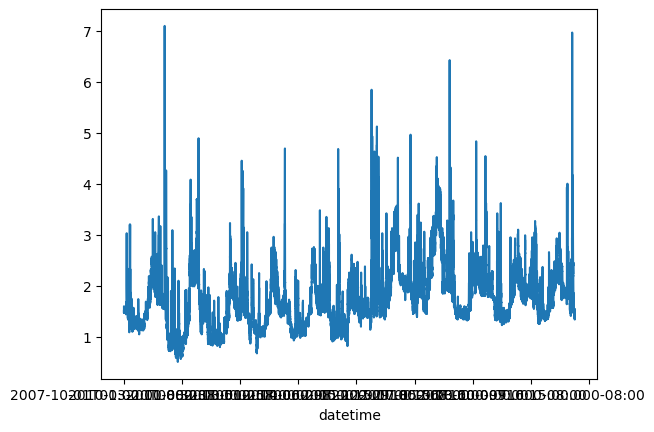

In [609]:
gage["00065"].plot()

In [ ]:
discharge2 = nwis.get_iv(sites=station, parameterCd=["00060","00065"], start=start, end=end)[0]

<AxesSubplot:xlabel='datetime'>

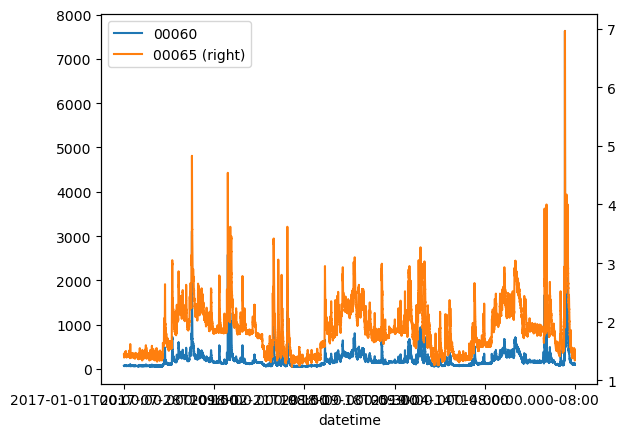

In [631]:
discharge2["2017":"2020"][["00060","00065"]].plot(secondary_y="00065")

<AxesSubplot:xlabel='00065'>

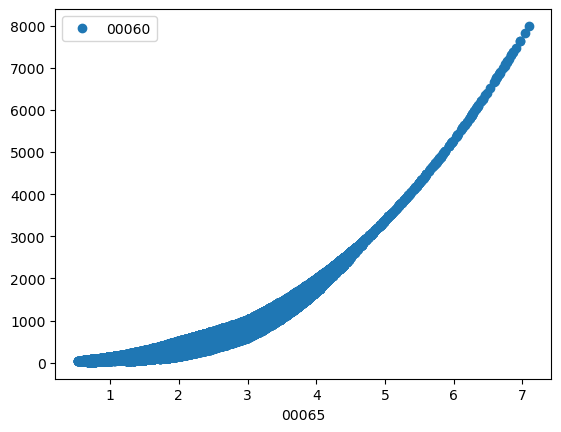

In [617]:
discharge2.plot(x="00065", y="00060", style="o")

# Look at other river forcing example file to make sure assumptions hold up

In [661]:
loc = "nos.ciofs.river.20230201.t00z.nc"
ds = xr.open_dataset(loc)
ds

<xarray.Dataset>
Dimensions:          (river: 36, s_rho: 30, time: 80)
Coordinates:
  * river            (river) int32 1 2 3 4 5 6 7 8 9 ... 29 30 31 32 33 34 35 36
Dimensions without coordinates: s_rho, time
Data variables:
    river_names      (river) |S46 ...
    river_Xposition  (river) int32 ...
    river_Eposition  (river) int32 ...
    river_direction  (river) int32 ...
    river_flag       (river) int32 ...
    river_sign       (river) float32 ...
    river_Vshape     (s_rho, river) float32 ...
    river_time       (time) datetime64[ns] ...
    river_transport  (time, river) float32 ...
    river_temp       (time, s_rho, river) float32 ...
    river_salt       (time, s_rho, river) float32 ...
    river_pass       (time, s_rho, river) float32 ...
Attributes:
    type:             ROMS river forcing netCDF file
    title:            ciofs River forcing netCDF file
    data_source:      River discharge from USGS real time or daily mean
    Temp_source:      River T from USGS real time or daily mean, Salt=0
    model_grid_file:  GRID file: nos.ciofs.romsgrid.nc
    output_file:      River Forcing file: nos.ciofs.river.20230201.t00z.nc
    source_code:      Created using nos_ofs_create_river_ROMS.sh
    history:          Created at time 00:51  02/01/2023
    reference:        Created by Aijun Zhang, OD/CO-OPS/NOS/NOAA

In [683]:
ds["river_transport"][:,20]

<xarray.DataArray 'river_transport' (time: 80)>
array([-0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.], dtype=float32)
Coordinates:
    river    int32 21
Dimensions without coordinates: time
Attributes:
    long_name:  river runoff vertically integrated mass transport
    units:      meter3 second-1
    field:      river_transport, scalar, series
    time:       river_time

In [692]:
ds["river_temp"][:,0,-1]

<xarray.DataArray 'river_temp' (time: 80)>
array([1.300006, 1.300006, 1.300006, 1.400006, 1.400006, 1.500006, 1.500006,
       1.500006, 1.500006, 1.500006, 1.500006, 1.500006, 1.500006, 1.400006,
       1.400006, 1.300006, 1.300006, 1.200006, 1.100006, 1.100006, 1.100006,
       1.000006, 1.000006, 1.000006, 1.000006, 1.000006, 1.000006, 1.000006,
       1.000006, 1.100006, 1.100006, 1.104731, 1.109429, 1.114154, 1.118879,
       1.123576, 1.128302, 1.133027, 1.137724, 1.142449, 1.147174, 1.151872,
       1.156597, 1.161322, 1.166019, 1.170745, 1.17547 , 1.180167, 1.184892,
       1.189617, 1.194315, 1.19904 , 1.203765, 1.208462, 1.213188, 1.217913,
       1.22261 , 1.227335, 1.23206 , 1.236758, 1.241483, 1.246208, 1.250906,
       1.255631, 1.260356, 1.265053, 1.269778, 1.274503, 1.279201, 1.283926,
       1.288651, 1.293349, 1.298074, 1.302799, 1.307496, 1.312221, 1.316947,
       1.321644, 1.326369, 1.331094], dtype=float32)
Coordinates:
    river    int32 36
Dimensions without coordinates: time
Attributes:
    long_name:  river runoff potential temperature
    units:      Celsius
    field:      river_temp, scalar, series
    time:       river_time

In [699]:
ds["river_sign"]

<xarray.DataArray 'river_sign' (river: 36)>
[36 values with dtype=float32]
Coordinates:
  * river    (river) int32 1 2 3 4 5 6 7 8 9 10 ... 28 29 30 31 32 33 34 35 36
Attributes:
    long_name:  River mass transport ambient sign
    units:      nondimensional
    field:      river_sign, scalar, series